# Customer Churn Analysis

## Imports

In [1]:
# basics
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from IPython.display import Markdown

# modeling
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures

# google drive
from google.colab import drive
drive.mount('/content/gdrive')

# data
customer_df = pd.read_csv('gdrive/My Drive/telecom-customer-churn/data/telecom_customer_churn.csv')
pop_df = pd.read_csv('gdrive/My Drive/telecom-customer-churn/data/telecom_zipcode_population.csv')
data_dict = pd.read_csv('gdrive/My Drive/telecom-customer-churn/data/telecom_data_dictionary.csv', encoding='latin1')

ModuleNotFoundError: No module named 'seaborn'

## Raw Data Analysis

### Data Dictionary

In [ ]:
# show the definitions of each column
data_dict

,Table,Field,Description
0,Customer Churn,CustomerID,A unique ID that identifies each customer
1,Customer Churn,Gender,"The customers gender: Male, Female"
2,Customer Churn,Age,"The customers current age, in years, at the time the fiscal quarter ended (Q2 2022)"
3,Customer Churn,Married,"Indicates if the customer is married: Yes, No"
4,Customer Churn,Number of Dependents,"Indicates the number of dependents that live with the customer (dependents could be children, parents, grandparents, etc.)"
5,Customer Churn,City,The city of the customers primary residence in California
6,Customer Churn,Zip Code,The zip code of the customers primary residence
7,Customer Churn,Latitude,The latitude of the customers primary residence
8,Customer Churn,Longitude,The longitude of the customers primary residence
9,Customer Churn,Number of Referrals,Indicates the number of times the customer has referred a friend or family member to this company to date


### Raw Data Analysis Functions

In [ ]:
# function to show basic info about a dataframe
def raw_data_analysis(df):
  print(f'Rows: {df.shape[0]}')
  print(f'Columns: {df.shape[1]}')
  print()
  print('Data')
  display(df.head())
  print()
  print('Missing Data')
  display(df.isna().sum().to_frame().T)
  print()
  print('Data Types')
  display(df.dtypes.to_frame().T)

### Customer DF Raw Data Analysis

In [ ]:
raw_data_analysis(customer_df)

Rows: 7043
Columns: 38

Data


,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,9,None,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,9,None,Yes,10.69,Yes,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,3,None,Yes,7.38,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability



Missing Data


,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0,0,0,0,0,0,0,0,0,0,0,0,0,682,682,0,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,0,0,0,0,0,0,0,0,0,0,5174,5174



Data Types


,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,object,object,int64,object,int64,object,int64,float64,float64,int64,int64,object,object,float64,object,object,object,float64,object,object,object,object,object,object,object,object,object,object,object,float64,float64,float64,int64,float64,float64,object,object,object


### Population DF Raw Data Analysis

In [ ]:
raw_data_analysis(pop_df)

Rows: 1671
Columns: 2

Data


,Zip Code,Population
0,90001,54492
1,90002,44586
2,90003,58198
3,90004,67852
4,90005,43019



Missing Data


,Zip Code,Population
0,0,0



Data Types


,Zip Code,Population
0,int64,int64


## Clean Raw Data

In [ ]:
# drop the Customer ID
customer_df.drop(columns=['Customer ID'], inplace=True)

In [ ]:
# convert zip code to a string
customer_df['Zip Code'] = customer_df['Zip Code'].apply(lambda x: f'{x:05d}')
pop_df['Zip Code'] = pop_df['Zip Code'].apply(lambda x: f'{x:05d}')

In [ ]:
# merge the DataFrames on the Zip Code column
customer_df = pd.merge(customer_df, pop_df, on='Zip Code', how='left')

In [ ]:
raw_data_analysis(customer_df)

Rows: 7043
Columns: 38

Data


,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason,Population
0,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,9,None,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN,4498
1,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,9,None,Yes,10.69,Yes,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN,31297
2,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices,62069
3,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction,46677
4,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,3,None,Yes,7.38,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability,42853



Missing Data


,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason,Population
0,0,0,0,0,0,0,0,0,0,0,0,0,682,682,0,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,0,0,0,0,0,0,0,0,0,0,5174,5174,0



Data Types


,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason,Population
0,object,int64,object,int64,object,object,float64,float64,int64,int64,object,object,float64,object,object,object,float64,object,object,object,object,object,object,object,object,object,object,object,float64,float64,float64,int64,float64,float64,object,object,object,int64


## Missing Values

### Avg Monthly Long Distance Charges
Indicates the customer’s average long distance charges, calculated to the end of the quarter specified above (if the customer is not subscribed to home phone service, this will be 0)

In [ ]:
# show the Phone Service values for all the rows missing Avg Monthly Long Distance Charges
customer_df[customer_df['Avg Monthly Long Distance Charges'].isna()]['Phone Service'].unique()

array(['No'], dtype=object)

In [ ]:
# fill in the missing values with zeros
customer_df['Avg Monthly Long Distance Charges'] = customer_df['Avg Monthly Long Distance Charges'].fillna(0)

### Multiple Lines

Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No (if the customer is not subscribed to home phone service, this will be No)

In [ ]:
# show the Phone Service values for all the rows missing Multiple Lines
customer_df[customer_df['Multiple Lines'].isna()]['Phone Service'].unique()

array(['No'], dtype=object)

In [ ]:
# fill in the missing values with zeros
customer_df['Multiple Lines'] = customer_df['Multiple Lines'].fillna('No')

### Internet Type
Indicates the customer's type of internet connection: DSL, Fiber Optic, Cable (if the customer is not subscribed to internet service, this will be None)

In [ ]:
# show the Internet Service values for all the rows missing Internet Type
customer_df[customer_df['Internet Type'].isna()]['Internet Service'].unique()

array(['No'], dtype=object)

In [ ]:
# fill in the missing values with zeros
customer_df['Internet Type'] = customer_df['Internet Type'].fillna('None')

### Avg Monthly GB Download

Indicates the customer’s average download volume in gigabytes, calculated to the end of the quarter specified above (if the customer is not subscribed to internet service, this will be 0)

In [ ]:
# show the Internet Service values for all the rows missing Avg Monthly GB Download
customer_df[customer_df['Avg Monthly GB Download'].isna()]['Internet Service'].unique()

array(['No'], dtype=object)

In [ ]:
# fill in the missing values with zeros
customer_df['Avg Monthly GB Download'] = customer_df['Avg Monthly GB Download'].fillna(0)

### Online Security

Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No (if the customer is not subscribed to internet service, this will be No)

In [ ]:
# show the Internet Service values for all the rows missing Online Security
customer_df[customer_df['Online Security'].isna()]['Internet Service'].unique()

array(['No'], dtype=object)

In [ ]:
# fill in the missing values with zeros
customer_df['Online Security'] = customer_df['Online Security'].fillna('No')

### Online Backup
Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No (if the customer is not subscribed to internet service, this will be No)

In [ ]:
# show the Internet Service values for all the rows missing Online Backup
customer_df[customer_df['Online Backup'].isna()]['Internet Service'].unique()

array(['No'], dtype=object)

In [ ]:
# fill in the missing values with zeros
customer_df['Online Backup'] = customer_df['Online Backup'].fillna('No')

### Device Protection Plan
Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No (if the customer is not subscribed to internet service, this will be No)

In [ ]:
# show the Internet Service values for all the rows missing Device Protection Plan
customer_df[customer_df['Device Protection Plan'].isna()]['Internet Service'].unique()

array(['No'], dtype=object)

In [ ]:
# fill in the missing values with zeros
customer_df['Device Protection Plan'] = customer_df['Device Protection Plan'].fillna('No')

### Premium Tech Support
Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No (if the customer is not subscribed to internet service, this will be No)

In [ ]:
# show the Internet Service values for all the rows missing Premium Tech Support
customer_df[customer_df['Premium Tech Support'].isna()]['Internet Service'].unique()

array(['No'], dtype=object)

In [ ]:
# fill in the missing values with zeros
customer_df['Premium Tech Support'] = customer_df['Premium Tech Support'].fillna('No')

### Streaming TV
Indicates if the customer uses their Internet service to stream television programing from a third party provider at no additional fee: Yes, No (if the customer is not subscribed to internet service, this will be No)

In [ ]:
# show the Internet Service values for all the rows missing Streaming TV
customer_df[customer_df['Streaming TV'].isna()]['Internet Service'].unique()

array(['No'], dtype=object)

In [ ]:
# fill in the missing values with zeros
customer_df['Streaming TV'] = customer_df['Streaming TV'].fillna('No')

### Streaming Movies
Indicates if the customer uses their Internet service to stream movies from a third party provider at no additional fee: Yes, No (if the customer is not subscribed to internet service, this will be No)



In [ ]:
# show the Internet Service values for all the rows missing Streaming Movies
customer_df[customer_df['Streaming Movies'].isna()]['Internet Service'].unique()

array(['No'], dtype=object)

In [ ]:
# fill in the missing values with zeros
customer_df['Streaming Movies'] = customer_df['Streaming Movies'].fillna('No')

### Streaming Music
Indicates if the customer uses their Internet service to stream music from a third party provider at no additional fee: Yes, No (if the customer is not subscribed to internet service, this will be No)

In [ ]:
# show the Internet Service values for all the rows missing Streaming Music
customer_df[customer_df['Streaming Music'].isna()]['Internet Service'].unique()

array(['No'], dtype=object)

In [ ]:
# fill in the missing values with zeros
customer_df['Streaming Music'] = customer_df['Streaming Music'].fillna('No')

### Unlimited Data
Indicates if the customer has paid an additional monthly fee to have unlimited data downloads/uploads: Yes, No (if the customer is not subscribed to internet service, this will be No)

In [ ]:
# show the Internet Service values for all the rows missing Unlimited Data
customer_df[customer_df['Unlimited Data'].isna()]['Internet Service'].unique()

array(['No'], dtype=object)

In [ ]:
# fill in the missing values with zeros
customer_df['Unlimited Data'] = customer_df['Unlimited Data'].fillna('No')

## EDA

In [ ]:
raw_data_analysis(customer_df)

Rows: 7043
Columns: 38

Data


,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason,Population
0,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,9,None,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN,4498
1,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,9,None,Yes,10.69,Yes,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN,31297
2,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices,62069
3,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction,46677
4,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,3,None,Yes,7.38,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability,42853



Missing Data


,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason,Population
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5174,5174,0



Data Types


,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason,Population
0,object,int64,object,int64,object,object,float64,float64,int64,int64,object,object,float64,object,object,object,float64,object,object,object,object,object,object,object,object,object,object,object,float64,float64,float64,int64,float64,float64,object,object,object,int64


### Principle Component Analysis

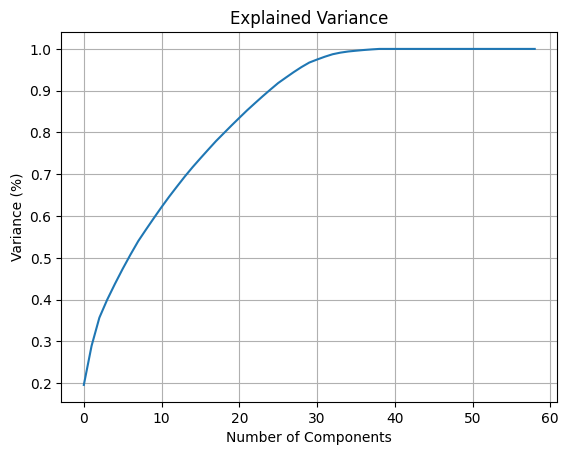

In [ ]:
# one hot encoder
pca_df = customer_df.copy()
pca_df = pca_df.drop(['City', 'Zip Code', 'Customer Status', 'Churn Category', 'Churn Reason'], axis=1)
categorical_cols = pca_df.select_dtypes(include=['object', 'category']).columns
one_hot = OneHotEncoder()

# One hot encode
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_cols)],
                                remainder='passthrough')
transformed_df = transformer.fit_transform(pca_df)
transformed_df = pd.DataFrame(transformed_df, columns=transformer.get_feature_names_out())

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(transformed_df)
scaled_df = pd.DataFrame(scaled_data, columns=transformed_df.columns)


# Principle Component Analysis
pca = PCA().fit(scaled_df)

# Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') # for each component
plt.title('Explained Variance')
plt.grid(True)
plt.show()

### Target Variable: Customer Status

In [ ]:
def cat_analysis(df, col_name):
  # stats
  display(df[col_name].describe())
  print()

  # categories
  display(pd.DataFrame({
      'Value Counts': df[col_name].value_counts(),
      '%': df[col_name].value_counts()/len(df[col_name])
    }))
  print()

  # count plot
  sns.countplot(data=df, x=col_name)
  plt.show()

count       7043
unique         3
top       Stayed
freq        4720
Name: Customer Status, dtype: object

,Value Counts,%
Stayed,4720,0.670169
Churned,1869,0.265370
Joined,454,0.064461


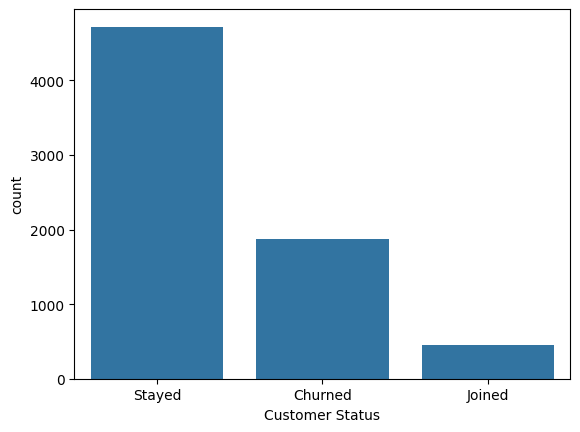

In [ ]:
cat_analysis(customer_df, 'Customer Status')

count       7043
unique         2
top       Stayed
freq        5174
Name: binary_customer_status, dtype: object

,Value Counts,%
Stayed,5174,0.73463
Churned,1869,0.26537


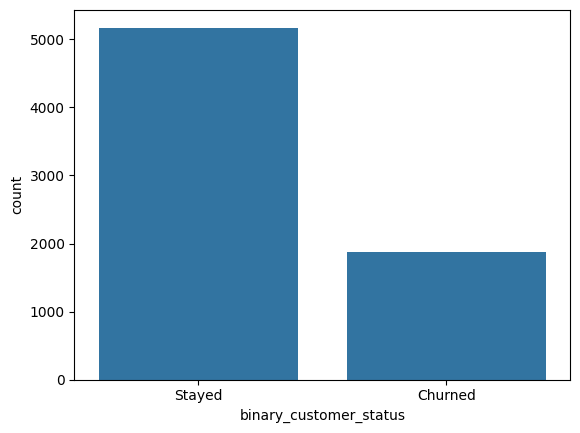

In [ ]:
# create a column where Joined = Stayed
customer_df['binary_customer_status'] = customer_df['Customer Status'].replace({'Joined': 'Stayed'})
cat_analysis(customer_df, 'binary_customer_status')

### Features

#### Latitude and Longitude - K-Means Clustering

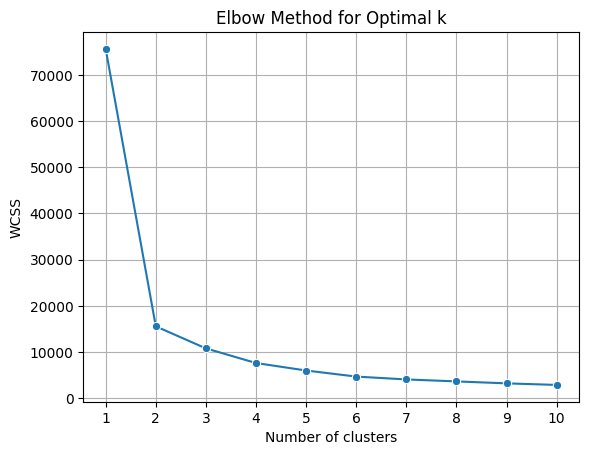

In [ ]:
# elbow method to find optimal k
wcss = []
for i in range(1, 11):  # Adjust the range as needed
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(customer_df[['Latitude', 'Longitude']])
    wcss.append(kmeans.inertia_)

# plot the within cluster sum of squares
sns.lineplot(x=range(1, 11), y=wcss, marker='o', dashes=True)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [ ]:
# Set the number of clusters
k = 3

# Initialize KMeans with the desired number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit KMeans using the latitude and longitude data
customer_df['regional_cluster'] = kmeans.fit_predict(customer_df[['Latitude', 'Longitude']])

# Convert numerical values to categorical type directly
customer_df['regional_cluster'] = customer_df['regional_cluster'].astype('category')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


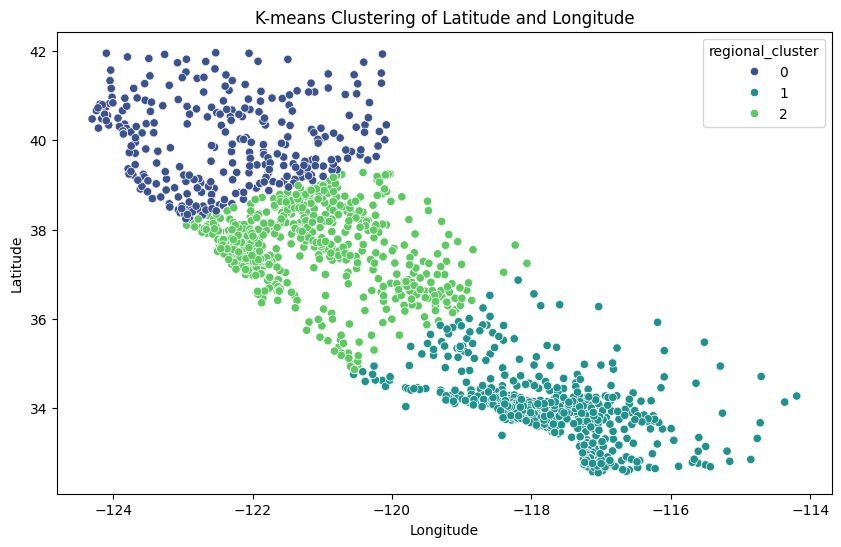

In [ ]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Longitude', y='Latitude', hue='regional_cluster', data=customer_df, palette='viridis', legend='full')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('K-means Clustering of Latitude and Longitude')
plt.show()

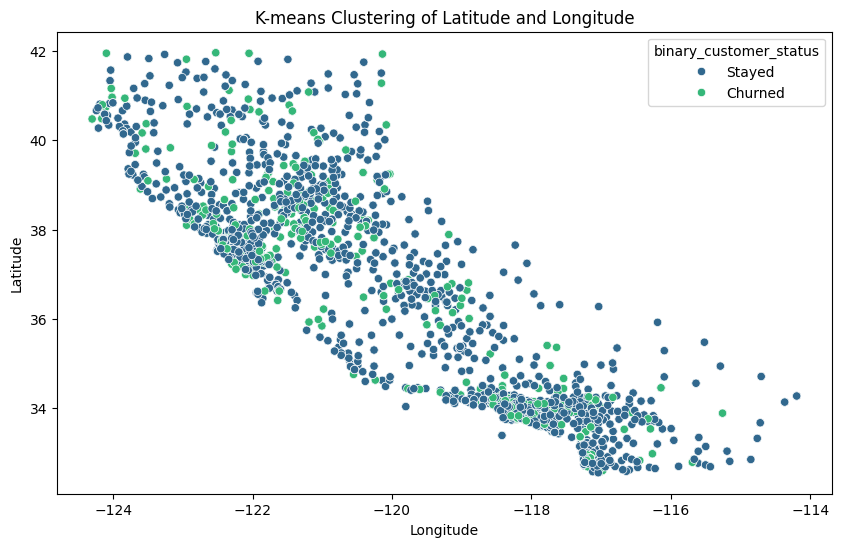

In [ ]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Longitude', y='Latitude', hue='binary_customer_status', data=customer_df, palette='viridis', legend='full')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('K-means Clustering of Latitude and Longitude')
plt.show()

In [ ]:
customer_df.head()

,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason,Population,binary_customer_status,regional_cluster
0,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,9,None,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN,4498,Stayed,1
1,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,9,None,Yes,10.69,Yes,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN,31297,Stayed,1
2,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices,62069,Churned,1
3,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction,46677,Churned,2
4,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,3,None,Yes,7.38,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability,42853,Churned,1


#### Distributions

# Gender

count     7043
unique       2
top       Male
freq      3555
Name: Gender, dtype: object

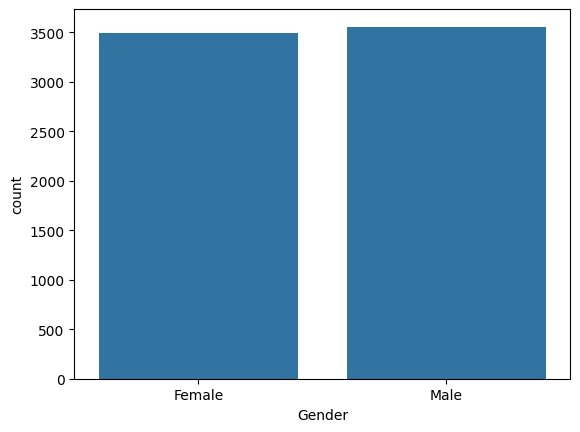

## Gender and Customer Status

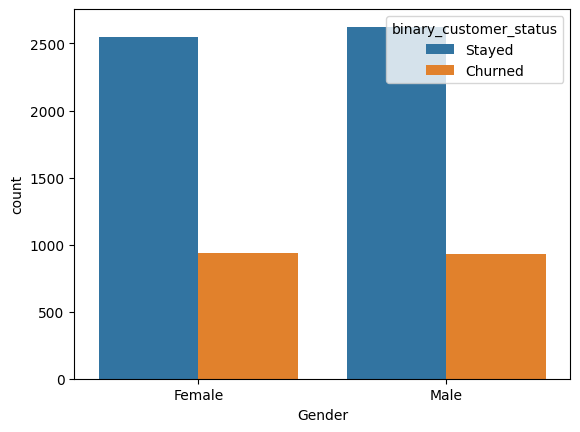

# Age

count    7043.000000
mean       46.509726
std        16.750352
min        19.000000
25%        32.000000
50%        46.000000
75%        60.000000
max        80.000000
Name: Age, dtype: float64

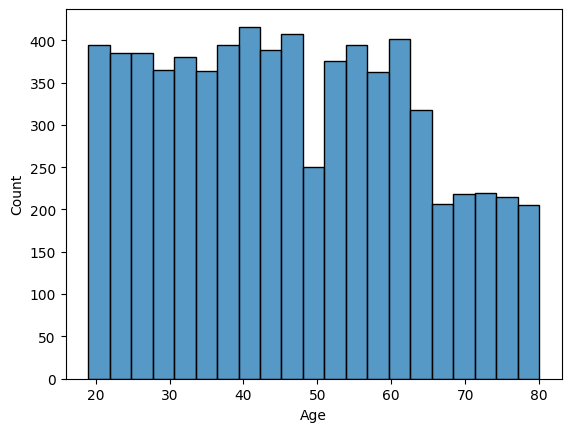

## Age and Customer Status

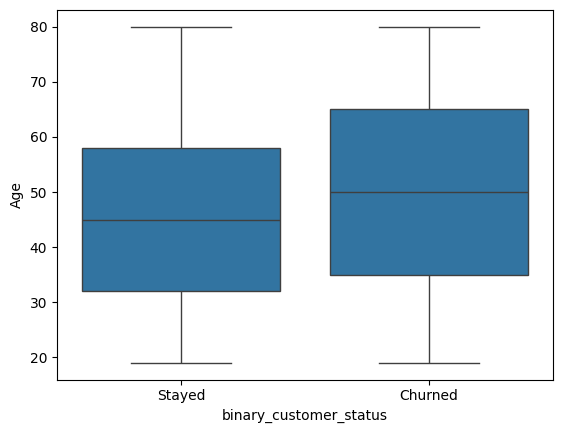

# Married

count     7043
unique       2
top         No
freq      3641
Name: Married, dtype: object

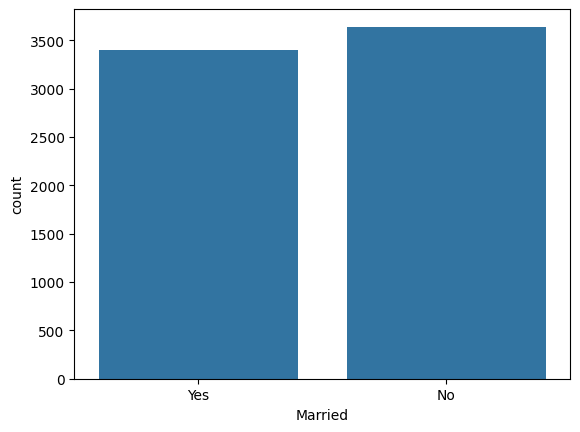

## Married and Customer Status

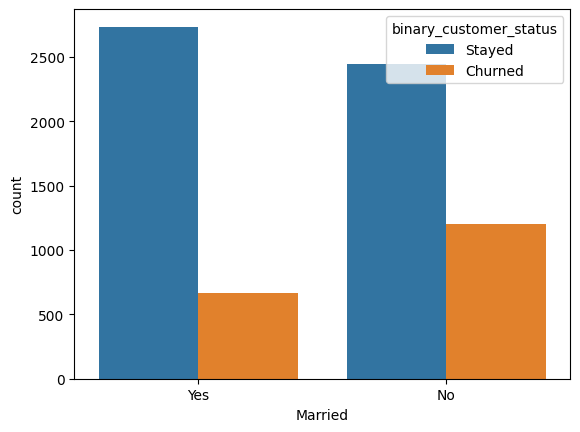

# Number of Dependents

count    7043.000000
mean        0.468692
std         0.962802
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         9.000000
Name: Number of Dependents, dtype: float64

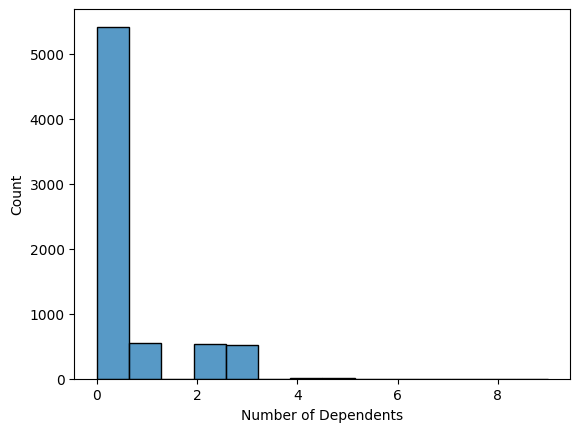

## Number of Dependents and Customer Status

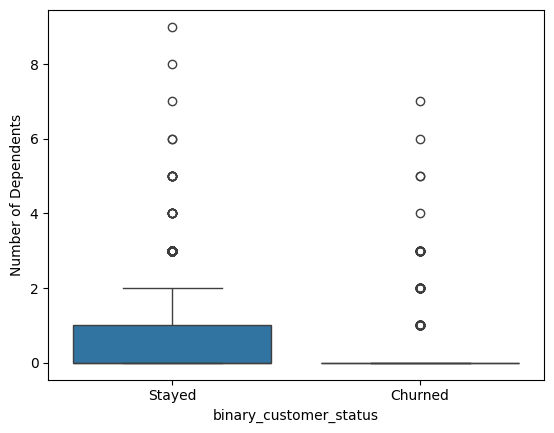

## Log Transformed Number of Dependents 

count    7043.000000
mean       -3.401039
std         2.208586
min        -4.605170
25%        -4.605170
50%        -4.605170
75%        -4.605170
max         2.198335
Name: Number of Dependents, dtype: float64

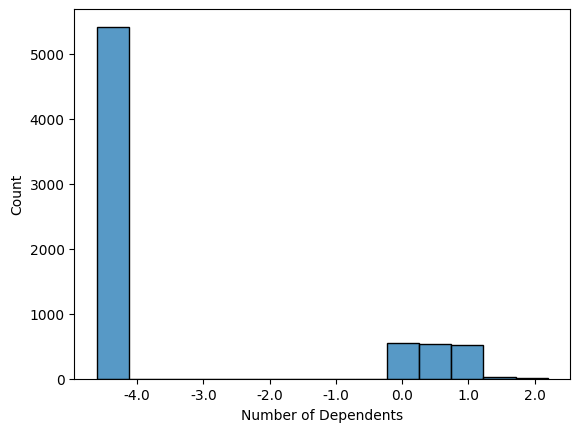

## Transformed Number of Dependents and Customer Status

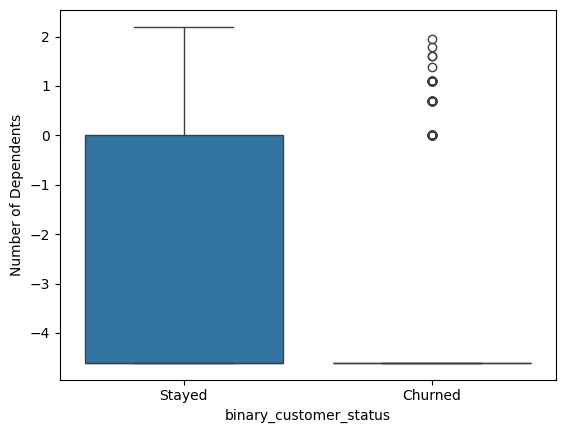

# City

count            7043
unique           1106
top       Los Angeles
freq              293
Name: City, dtype: object

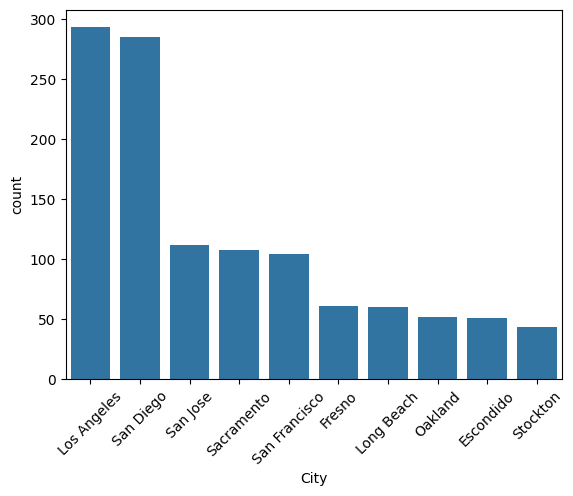

# Zip Code

count      7043
unique     1626
top       92028
freq         43
Name: Zip Code, dtype: object

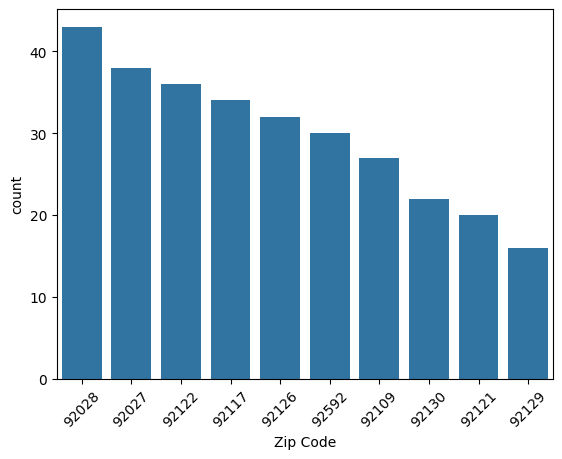

# Latitude

count    7043.000000
mean       36.197455
std         2.468929
min        32.555828
25%        33.990646
50%        36.205465
75%        38.161321
max        41.962127
Name: Latitude, dtype: float64

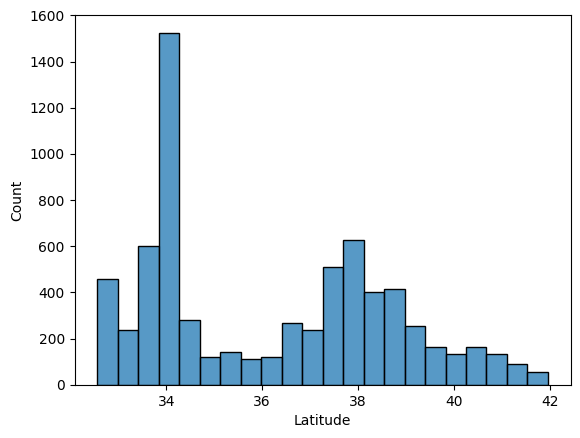

## Latitude and Customer Status

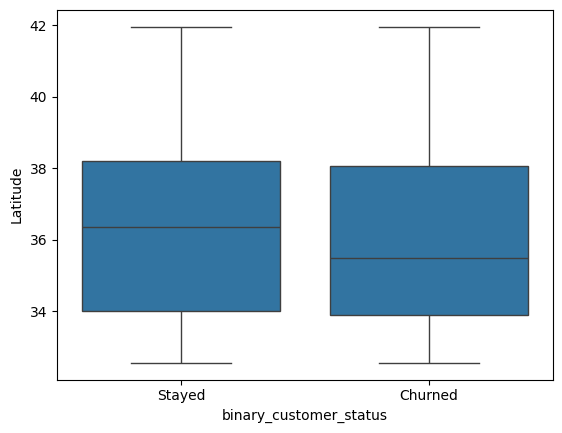

# Longitude

count    7043.000000
mean     -119.756684
std         2.154425
min      -124.301372
25%      -121.788090
50%      -119.595293
75%      -117.969795
max      -114.192901
Name: Longitude, dtype: float64

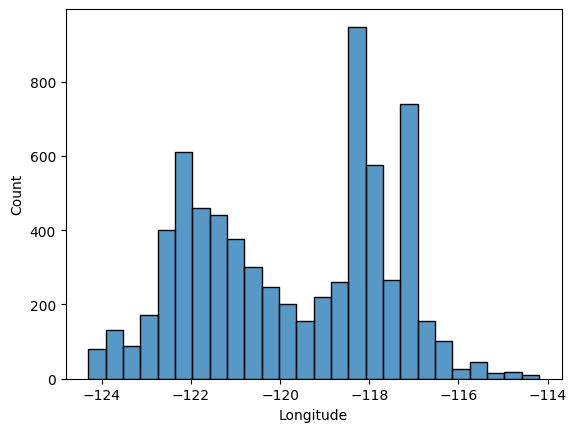

## Longitude and Customer Status

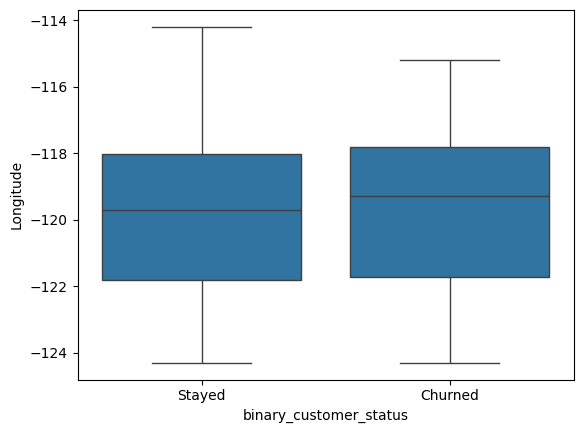

# Number of Referrals

count    7043.000000
mean        1.951867
std         3.001199
min         0.000000
25%         0.000000
50%         0.000000
75%         3.000000
max        11.000000
Name: Number of Referrals, dtype: float64

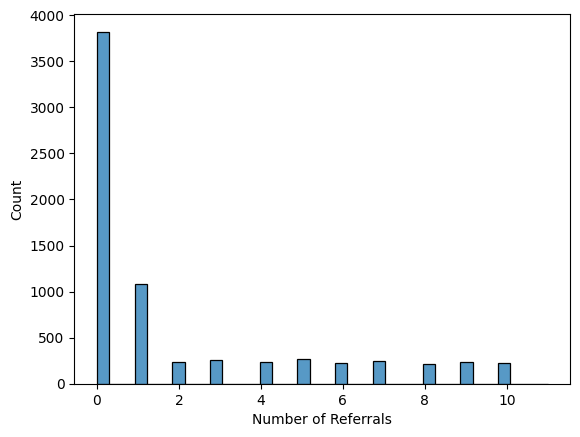

## Number of Referrals and Customer Status

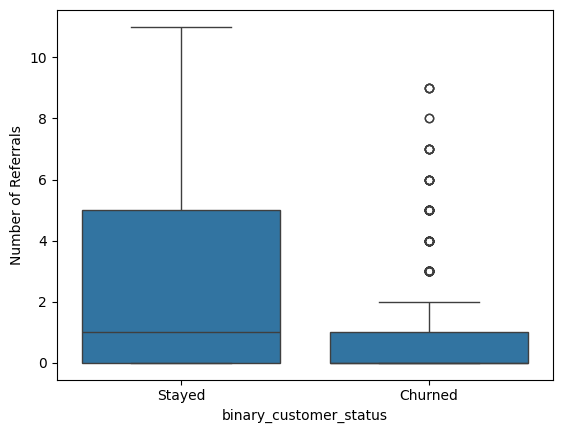

## Log Transformed Number of Referrals 

count    7043.000000
mean       -1.990976
std         2.909205
min        -4.605170
25%        -4.605170
50%        -4.605170
75%         1.101940
max         2.398804
Name: Number of Referrals, dtype: float64

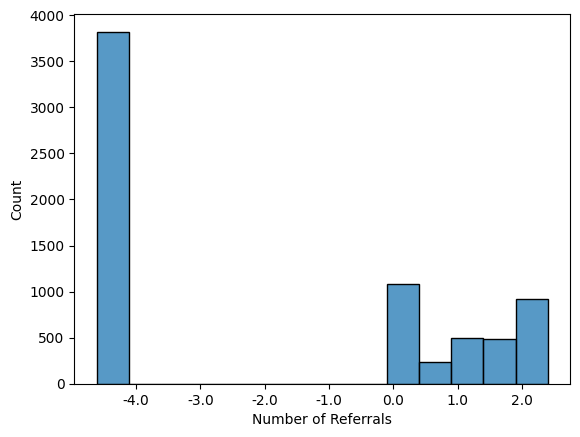

## Transformed Number of Referrals and Customer Status

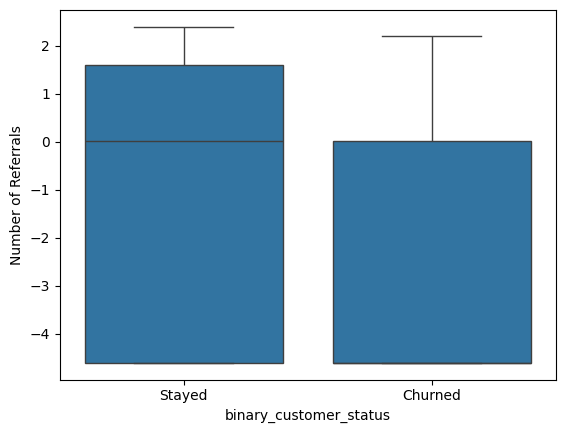

# Tenure in Months

count    7043.000000
mean       32.386767
std        24.542061
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: Tenure in Months, dtype: float64

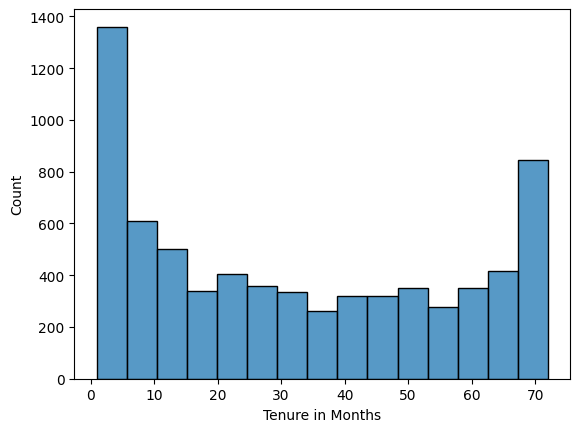

## Tenure in Months and Customer Status

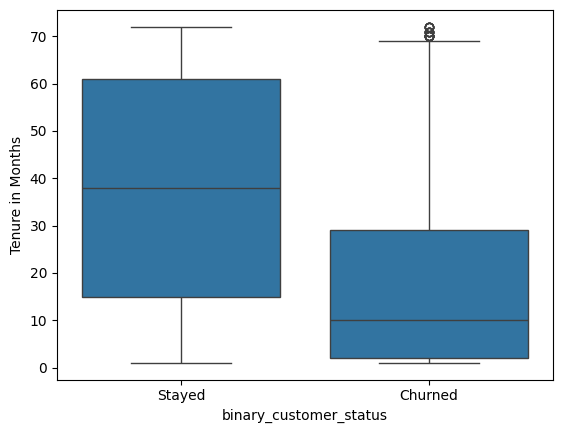

## Polynomial Transformed Tenure in Months 

count    7043.000000
mean     1651.129916
std      1791.633805
min         1.000000
25%        81.000000
50%       841.000000
75%      3025.000000
max      5184.000000
Name: Tenure in Months, dtype: float64

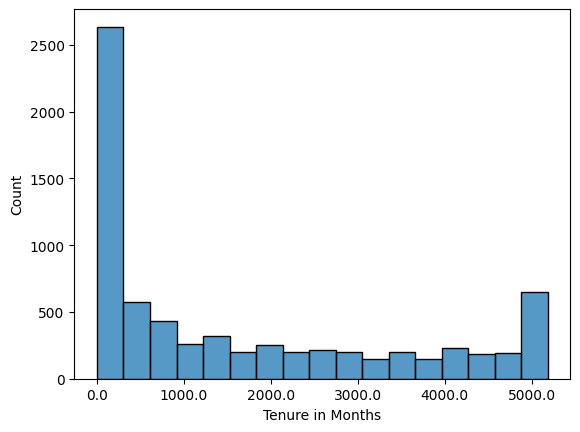

## Transformed Tenure in Months and Customer Status

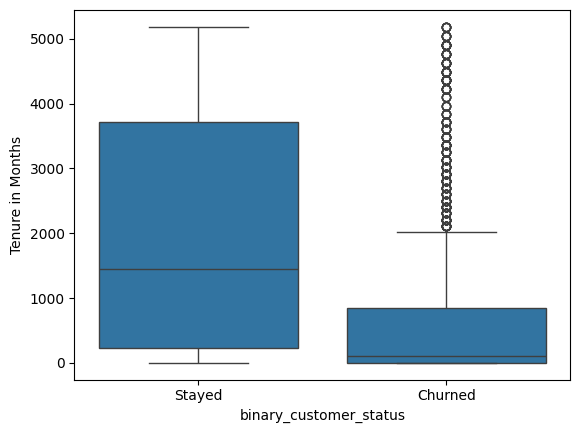

# Offer

count     7043
unique       6
top       None
freq      3877
Name: Offer, dtype: object

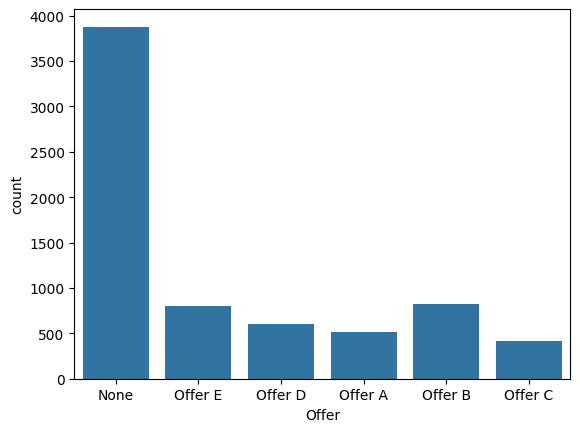

## Offer and Customer Status

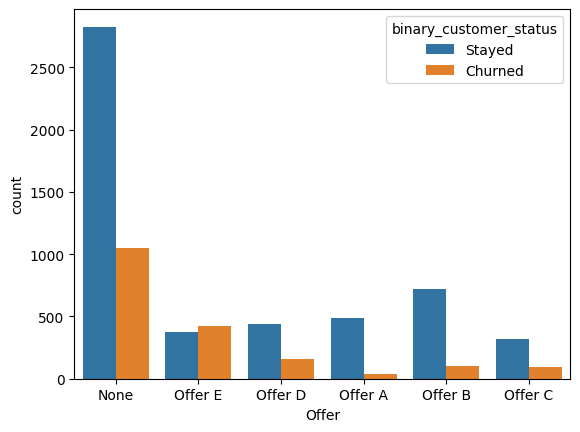

# Phone Service

count     7043
unique       2
top        Yes
freq      6361
Name: Phone Service, dtype: object

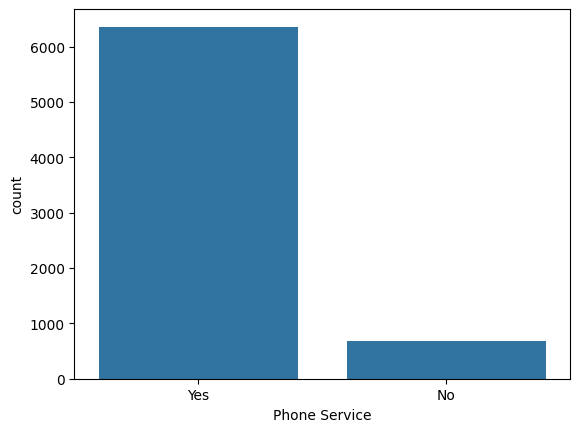

## Phone Service and Customer Status

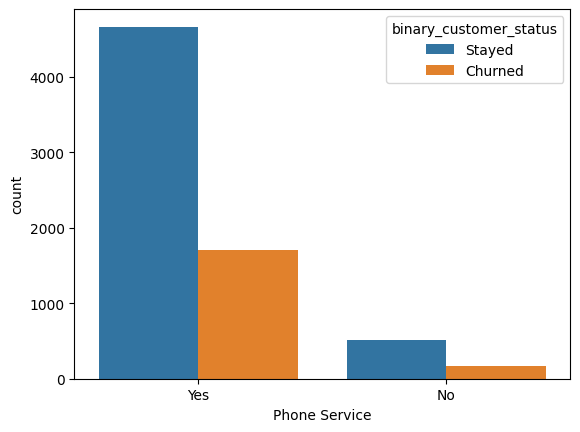

# Avg Monthly Long Distance Charges

count    7043.000000
mean       22.958954
std        15.448113
min         0.000000
25%         9.210000
50%        22.890000
75%        36.395000
max        49.990000
Name: Avg Monthly Long Distance Charges, dtype: float64

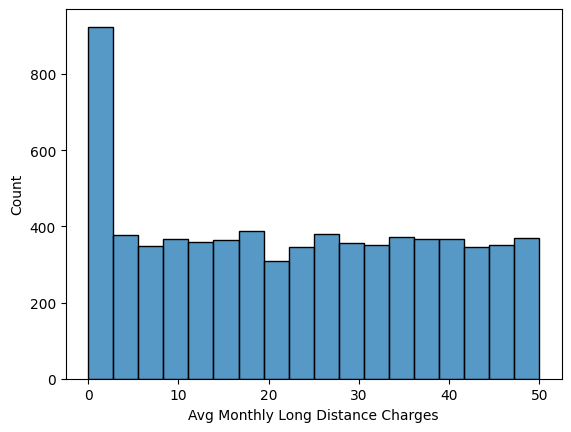

## Avg Monthly Long Distance Charges and Customer Status

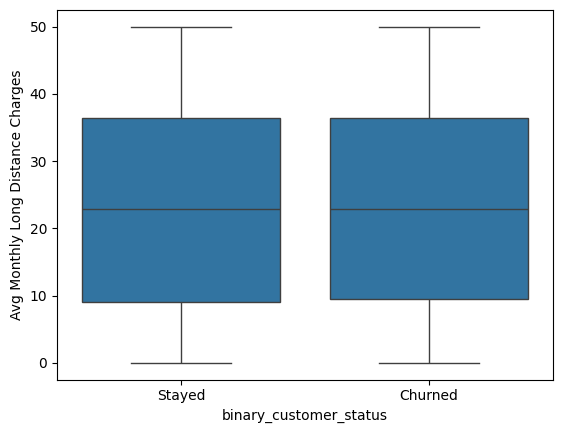

## Log Transformed Avg Monthly Long Distance Charges 

count    7043.000000
mean        2.249303
std         2.380726
min        -4.605170
25%         2.221375
50%         3.131137
75%         3.594706
max         3.912023
Name: Avg Monthly Long Distance Charges, dtype: float64

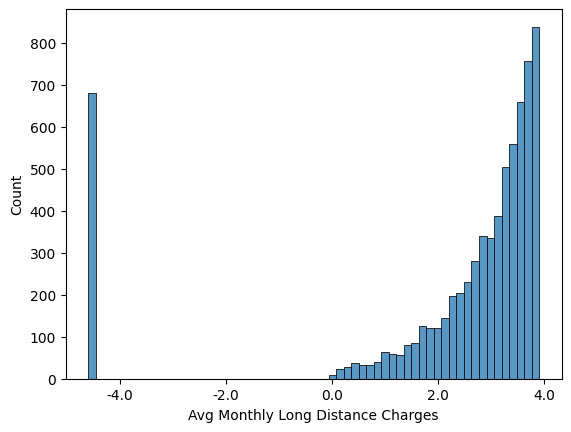

## Transformed Avg Monthly Long Distance Charges and Customer Status

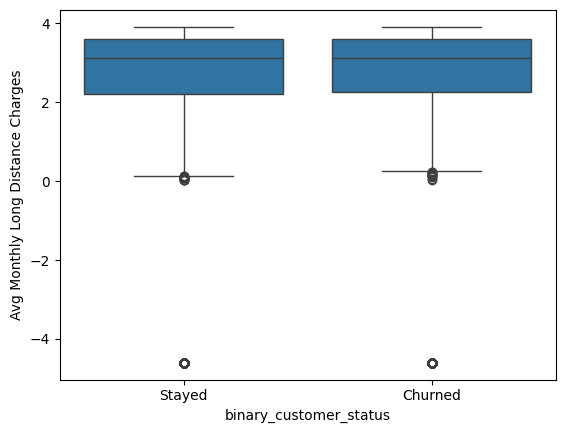

# Multiple Lines

count     7043
unique       2
top         No
freq      4072
Name: Multiple Lines, dtype: object

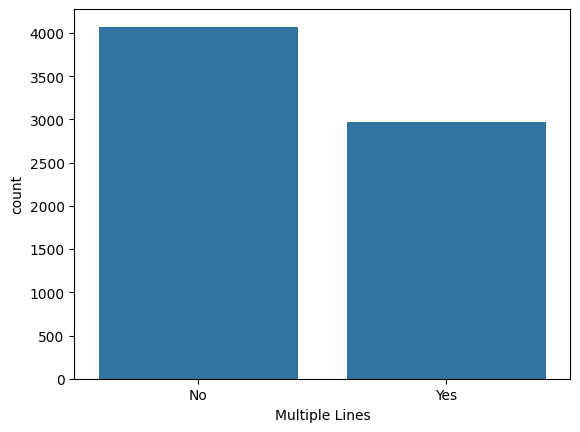

## Multiple Lines and Customer Status

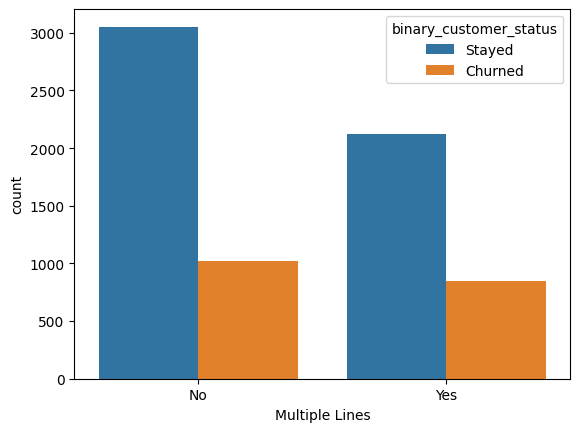

# Internet Service

count     7043
unique       2
top        Yes
freq      5517
Name: Internet Service, dtype: object

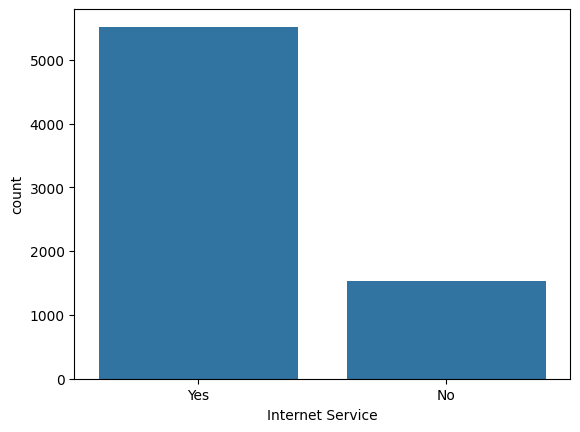

## Internet Service and Customer Status

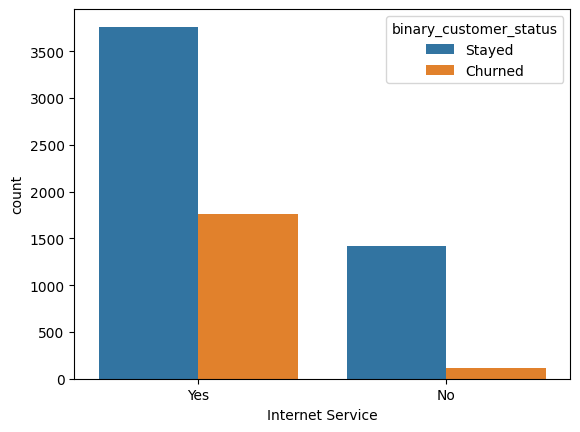

# Internet Type

count            7043
unique              4
top       Fiber Optic
freq             3035
Name: Internet Type, dtype: object

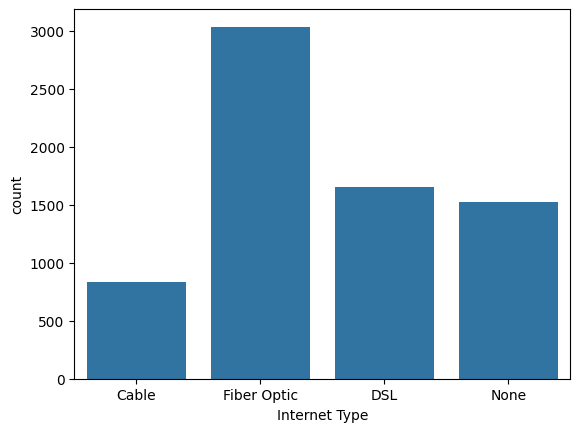

## Internet Type and Customer Status

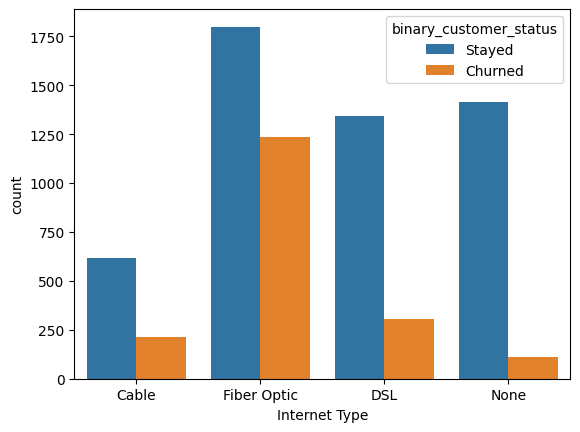

# Avg Monthly GB Download

count    7043.000000
mean       20.515405
std        20.418940
min         0.000000
25%         3.000000
50%        17.000000
75%        27.000000
max        85.000000
Name: Avg Monthly GB Download, dtype: float64

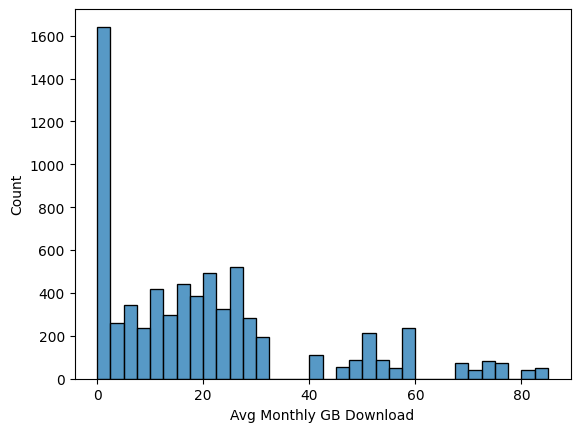

## Avg Monthly GB Download and Customer Status

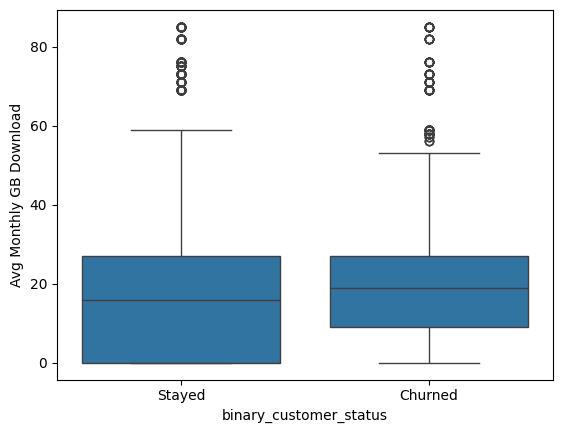

## Log Transformed Avg Monthly GB Download 

count    7043.000000
mean        1.325934
std         3.205626
min        -4.605170
25%         1.101940
50%         2.833801
75%         3.296207
max         4.442769
Name: Avg Monthly GB Download, dtype: float64

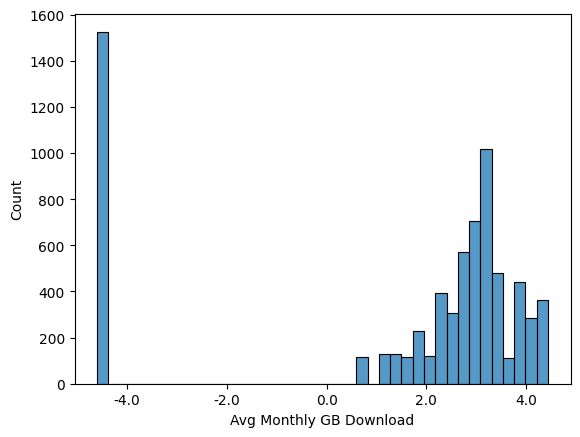

## Transformed Avg Monthly GB Download and Customer Status

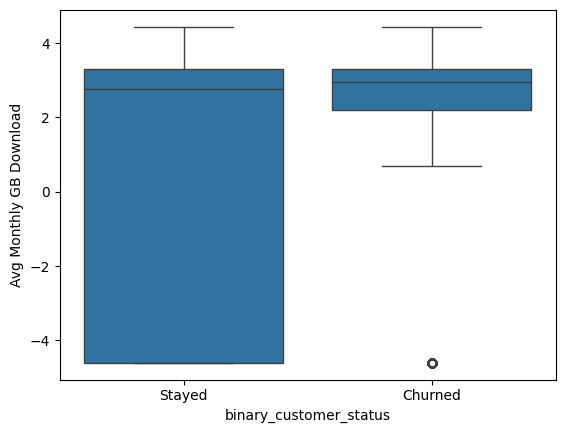

# Online Security

count     7043
unique       2
top         No
freq      5024
Name: Online Security, dtype: object

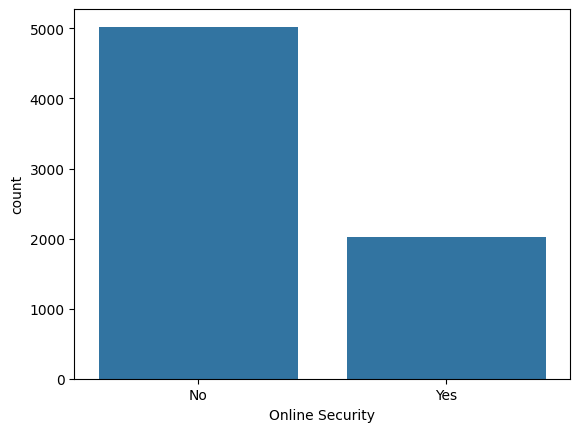

## Online Security and Customer Status

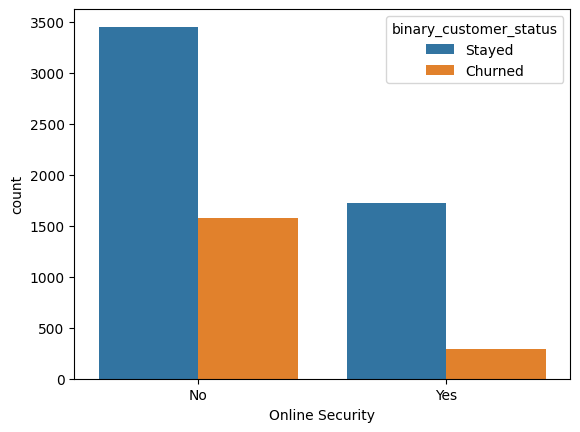

# Online Backup

count     7043
unique       2
top         No
freq      4614
Name: Online Backup, dtype: object

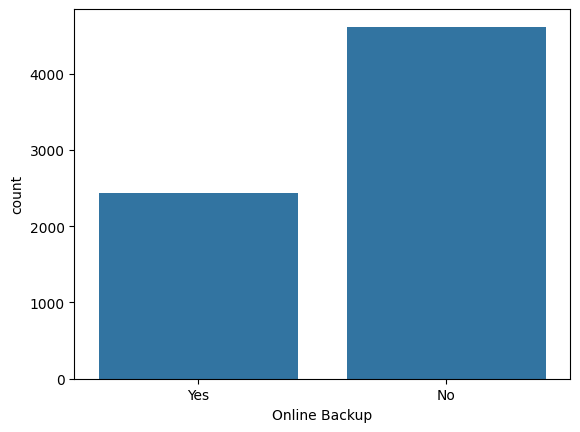

## Online Backup and Customer Status

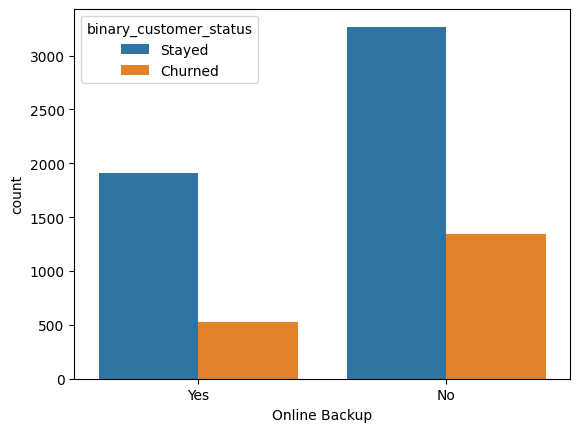

# Device Protection Plan

count     7043
unique       2
top         No
freq      4621
Name: Device Protection Plan, dtype: object

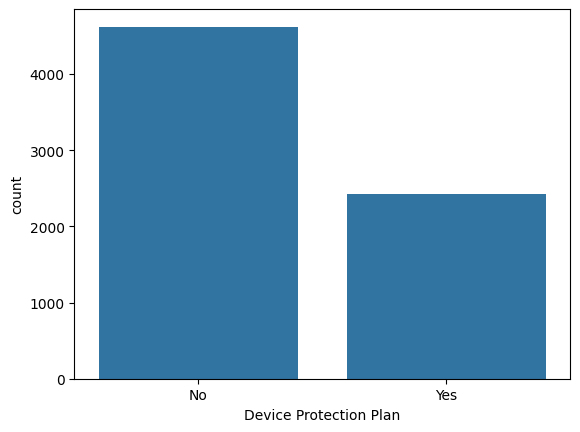

## Device Protection Plan and Customer Status

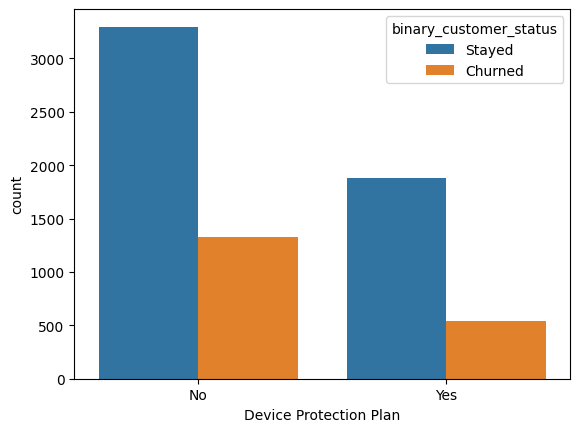

# Premium Tech Support

count     7043
unique       2
top         No
freq      4999
Name: Premium Tech Support, dtype: object

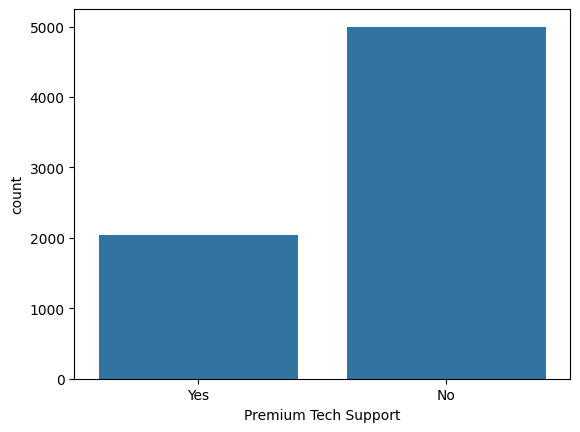

## Premium Tech Support and Customer Status

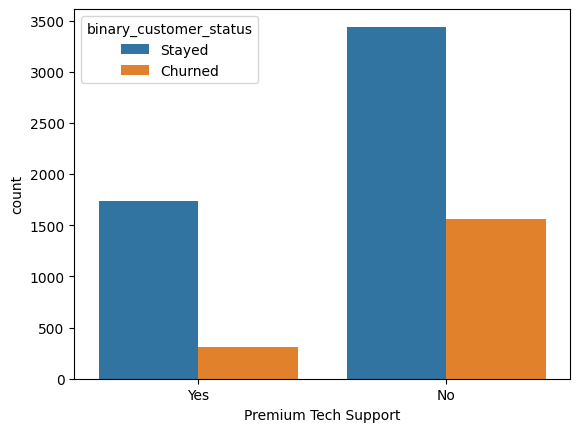

# Streaming TV

count     7043
unique       2
top         No
freq      4336
Name: Streaming TV, dtype: object

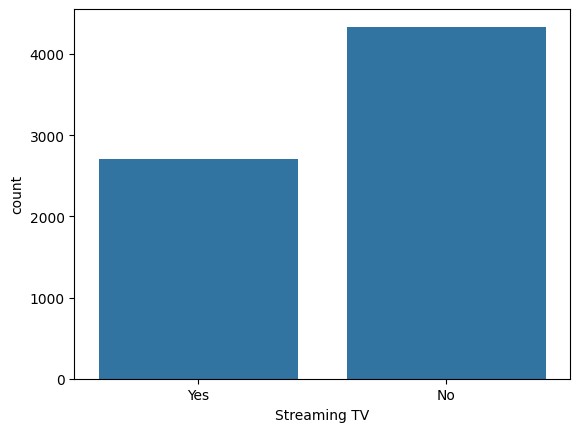

## Streaming TV and Customer Status

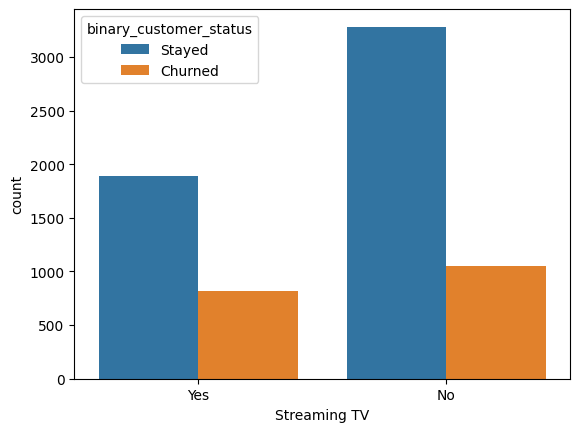

# Streaming Movies

count     7043
unique       2
top         No
freq      4311
Name: Streaming Movies, dtype: object

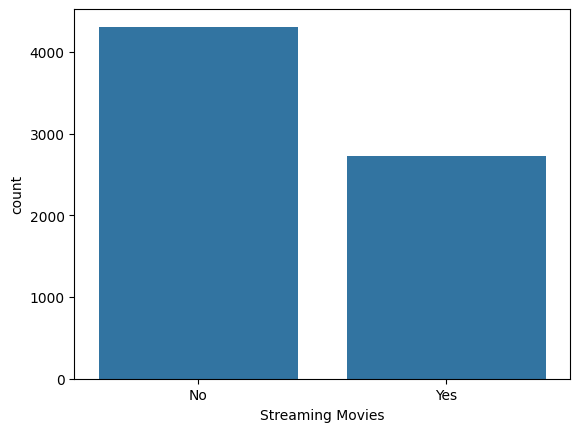

## Streaming Movies and Customer Status

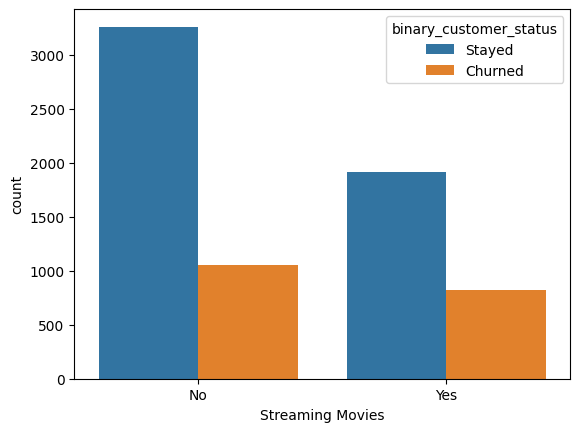

# Streaming Music

count     7043
unique       2
top         No
freq      4555
Name: Streaming Music, dtype: object

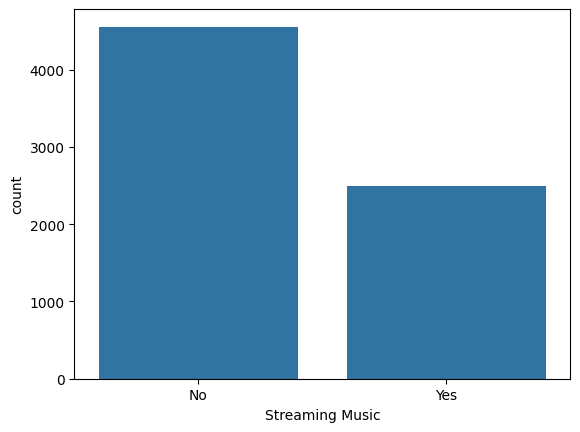

## Streaming Music and Customer Status

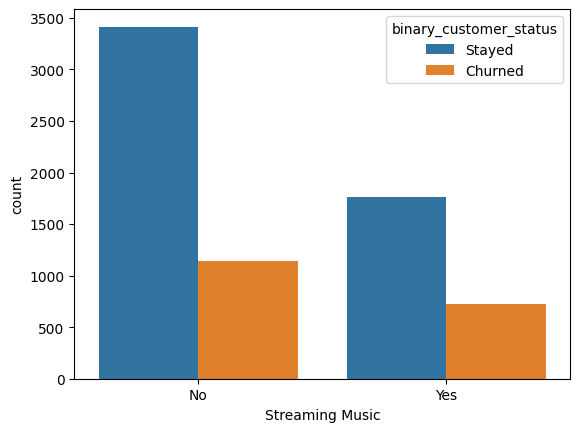

# Unlimited Data

count     7043
unique       2
top        Yes
freq      4745
Name: Unlimited Data, dtype: object

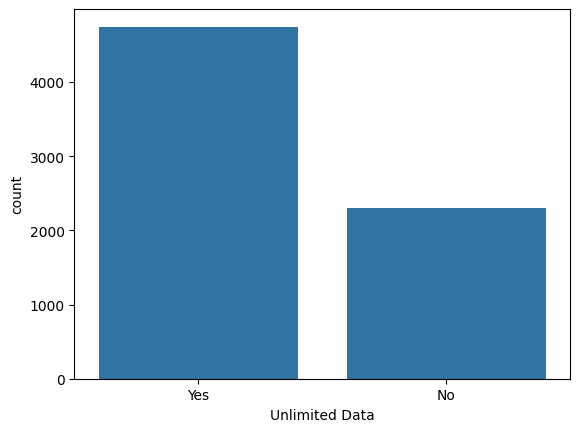

## Unlimited Data and Customer Status

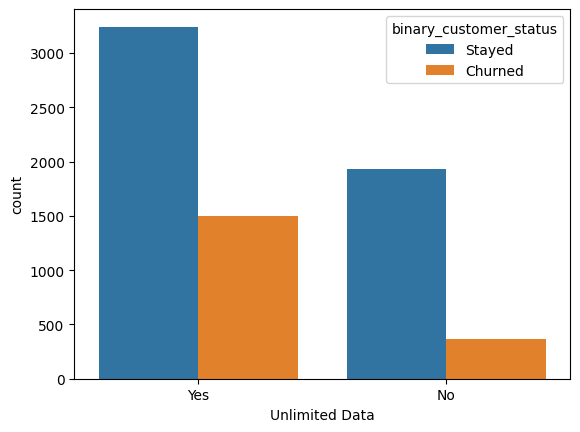

# Contract

count               7043
unique                 3
top       Month-to-Month
freq                3610
Name: Contract, dtype: object

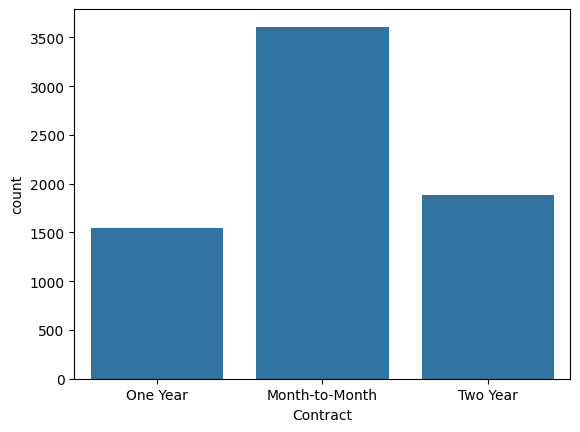

## Contract and Customer Status

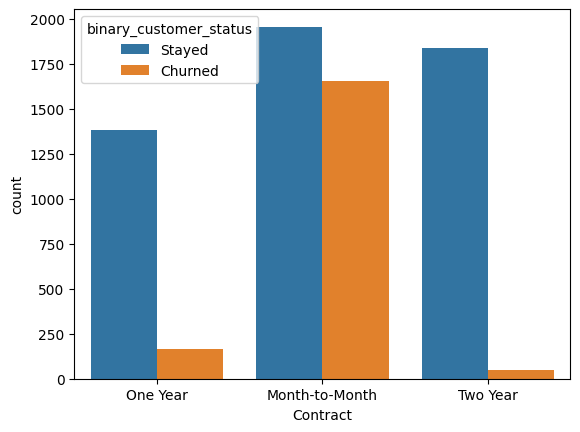

# Paperless Billing

count     7043
unique       2
top        Yes
freq      4171
Name: Paperless Billing, dtype: object

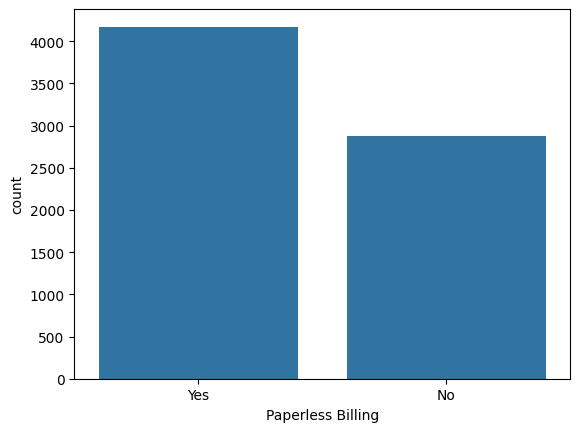

## Paperless Billing and Customer Status

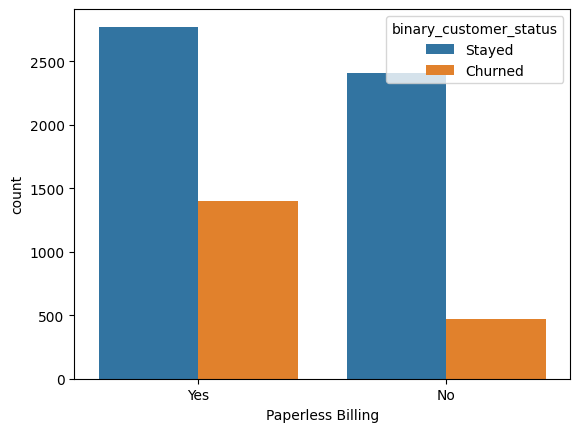

# Payment Method

count                7043
unique                  3
top       Bank Withdrawal
freq                 3909
Name: Payment Method, dtype: object

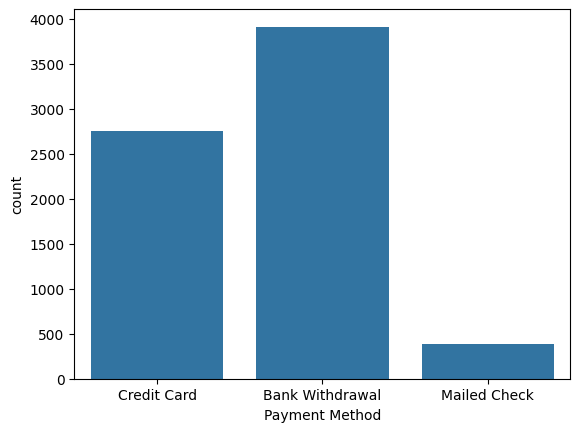

## Payment Method and Customer Status

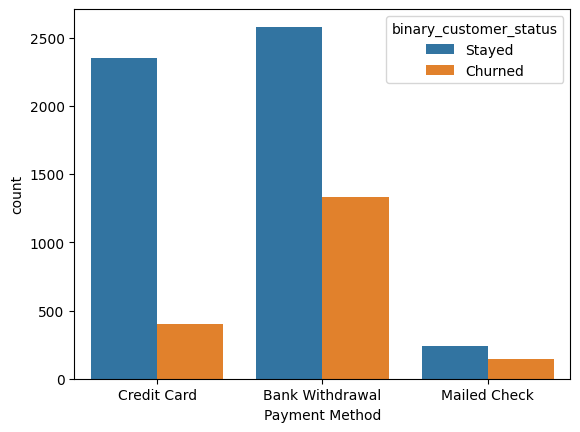

# Monthly Charge

count    7043.000000
mean       63.596131
std        31.204743
min       -10.000000
25%        30.400000
50%        70.050000
75%        89.750000
max       118.750000
Name: Monthly Charge, dtype: float64

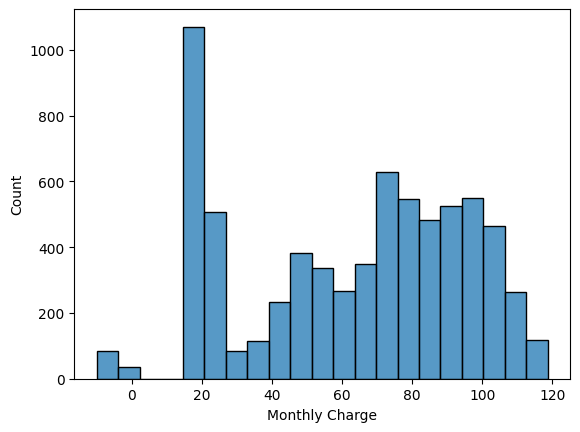

## Monthly Charge and Customer Status

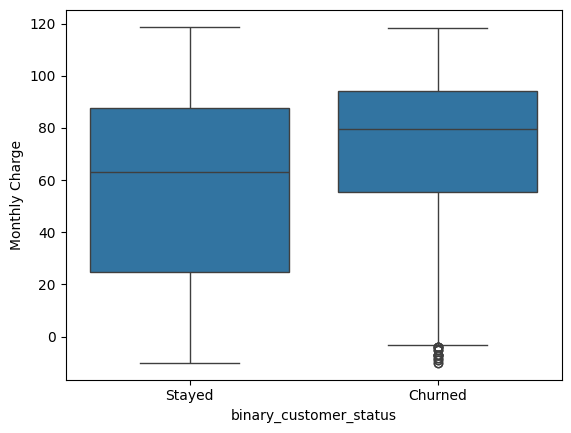

## Log Transformed Monthly Charge 

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


count    6923.000000
mean        4.022524
std         0.594495
min         2.904713
25%         3.569814
50%         4.253625
75%         4.498809
max         4.777105
Name: Monthly Charge, dtype: float64

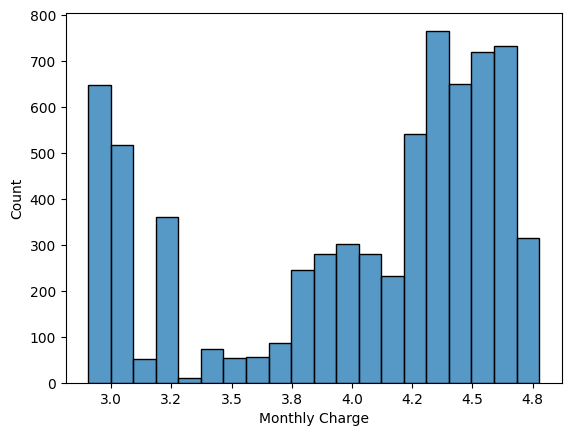

## Transformed Monthly Charge and Customer Status

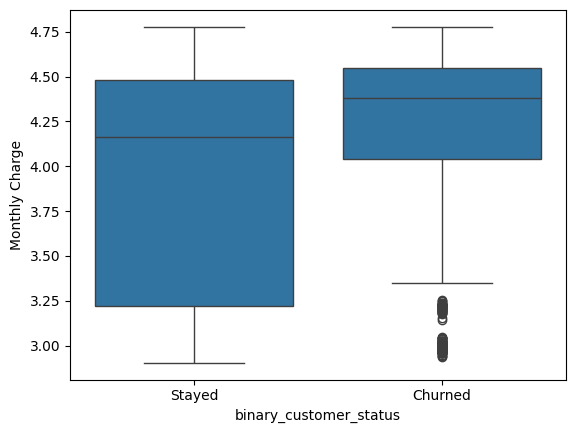

# Total Charges

count    7043.000000
mean     2280.381264
std      2266.220462
min        18.800000
25%       400.150000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: Total Charges, dtype: float64

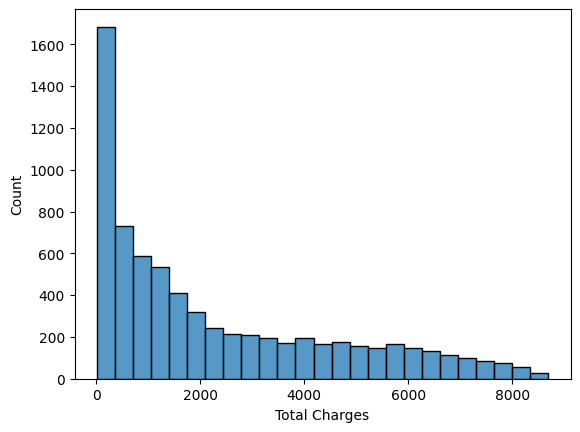

## Total Charges and Customer Status

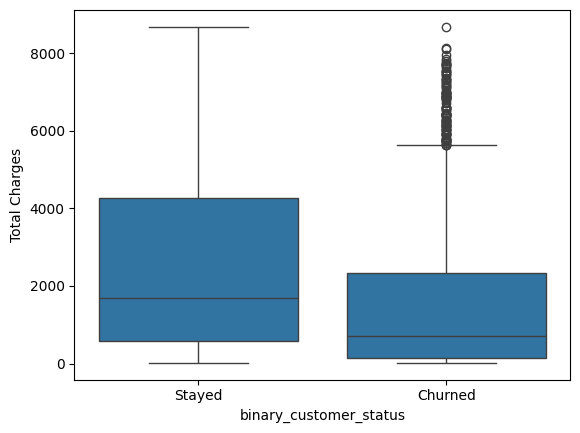

## Log Transformed Total Charges 

count    7043.000000
mean        6.937852
std         1.552583
min         2.934389
25%         5.991864
50%         7.240334
75%         8.239226
max         9.069331
Name: Total Charges, dtype: float64

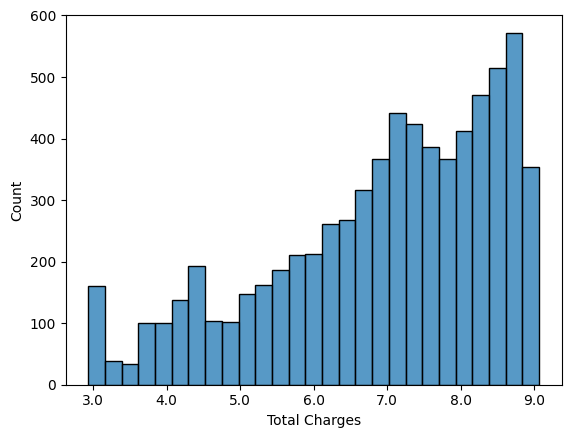

## Transformed Total Charges and Customer Status

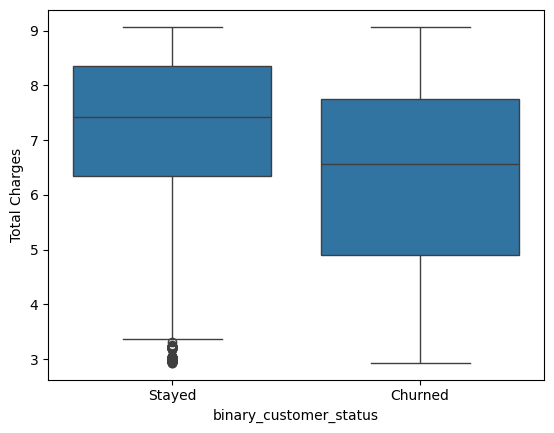

# Total Refunds

count    7043.000000
mean        1.962182
std         7.902614
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        49.790000
Name: Total Refunds, dtype: float64

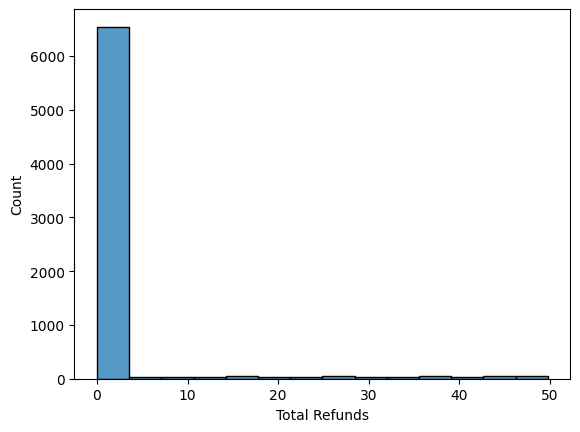

## Total Refunds and Customer Status

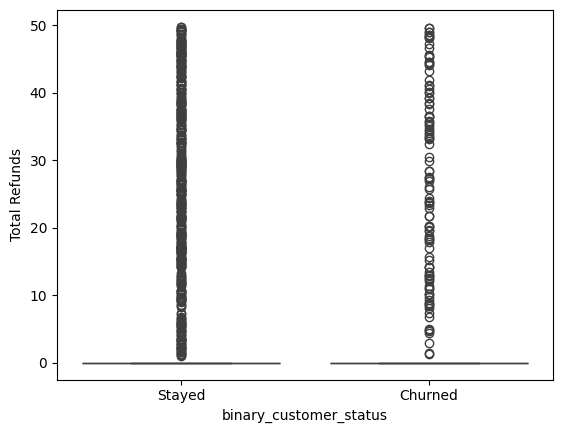

## Log Transformed Total Refunds 

count    7043.000000
mean       -4.035163
std         2.020483
min        -4.605170
25%        -4.605170
50%        -4.605170
75%        -4.605170
max         3.908015
Name: Total Refunds, dtype: float64

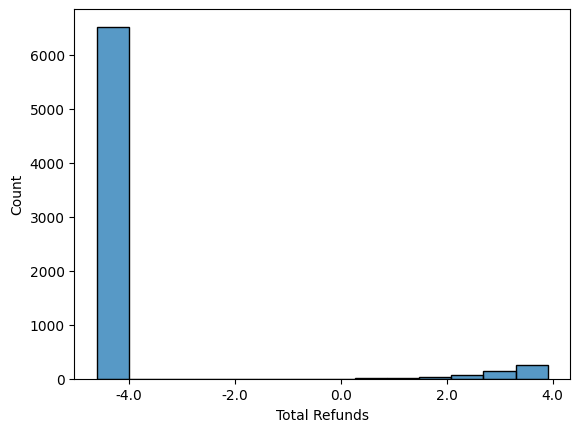

## Transformed Total Refunds and Customer Status

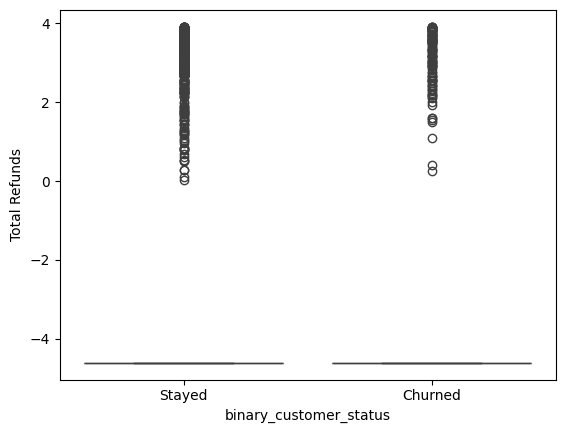

# Total Extra Data Charges

count    7043.000000
mean        6.860713
std        25.104978
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       150.000000
Name: Total Extra Data Charges, dtype: float64

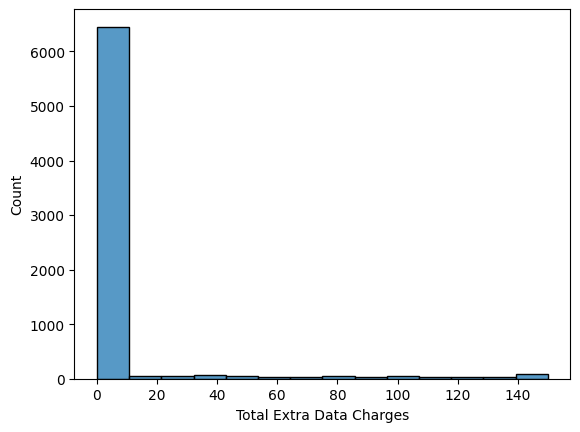

## Total Extra Data Charges and Customer Status

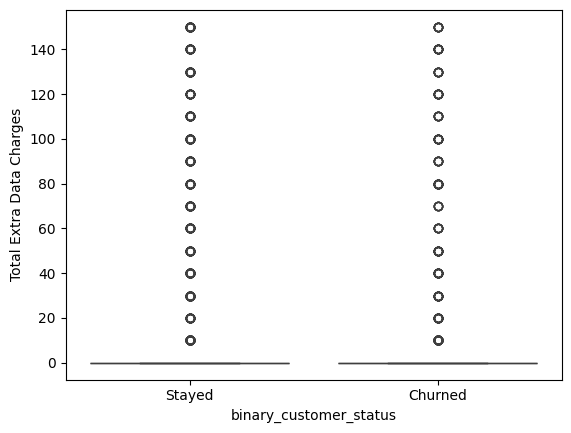

## Log Transformed Total Extra Data Charges 

count    7043.000000
mean       -3.731556
std         2.590579
min        -4.605170
25%        -4.605170
50%        -4.605170
75%        -4.605170
max         5.010702
Name: Total Extra Data Charges, dtype: float64

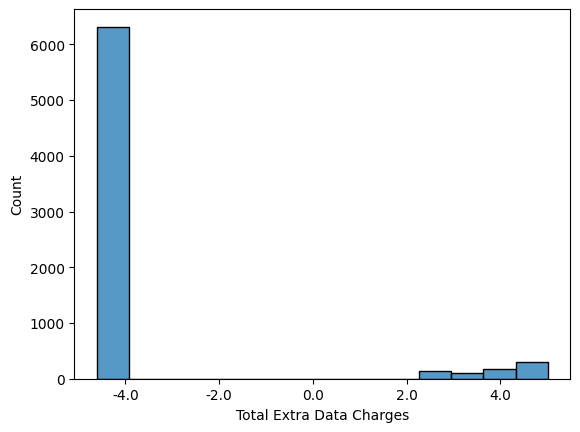

## Transformed Total Extra Data Charges and Customer Status

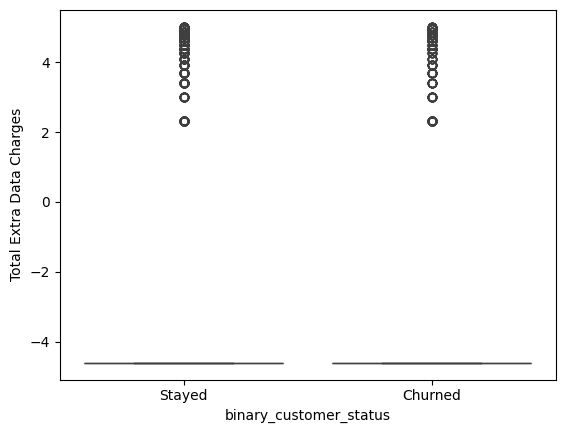

# Total Long Distance Charges

count    7043.000000
mean      749.099262
std       846.660055
min         0.000000
25%        70.545000
50%       401.440000
75%      1191.100000
max      3564.720000
Name: Total Long Distance Charges, dtype: float64

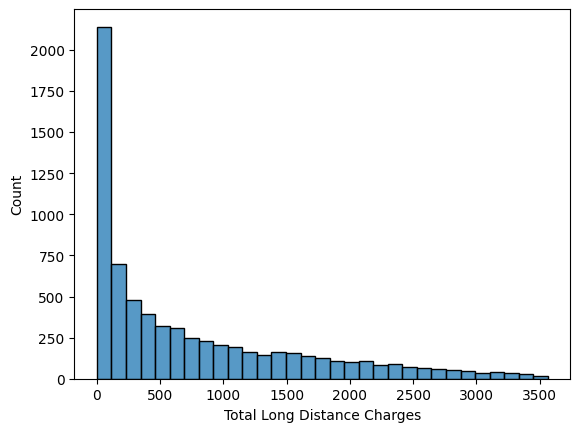

## Total Long Distance Charges and Customer Status

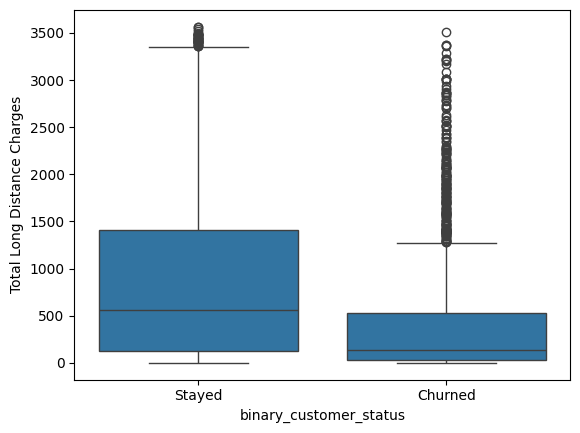

## Log Transformed Total Long Distance Charges 

count    7043.000000
mean        4.885129
std         3.448908
min        -4.605170
25%         4.256392
50%         5.995083
75%         7.082641
max         8.178844
Name: Total Long Distance Charges, dtype: float64

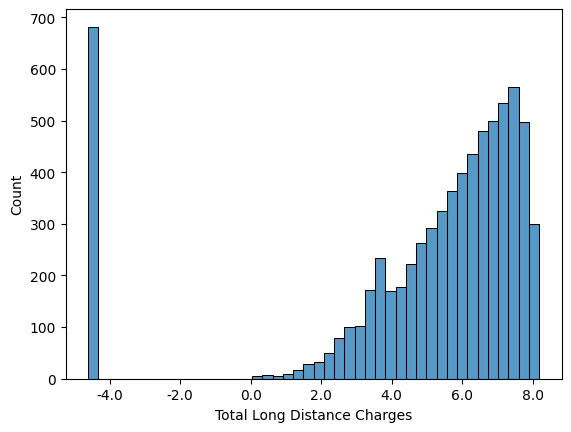

## Transformed Total Long Distance Charges and Customer Status

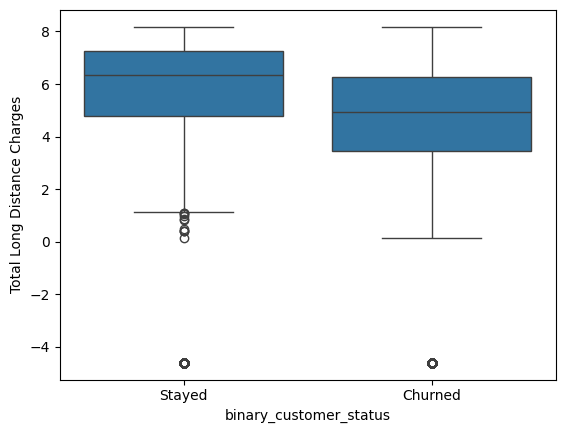

# Total Revenue

count     7043.000000
mean      3034.379056
std       2865.204542
min         21.360000
25%        605.610000
50%       2108.640000
75%       4801.145000
max      11979.340000
Name: Total Revenue, dtype: float64

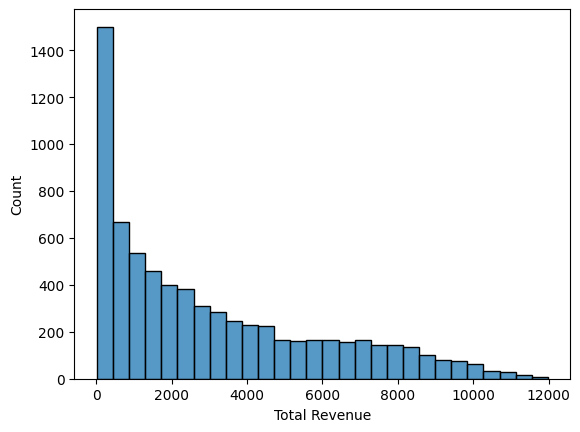

## Total Revenue and Customer Status

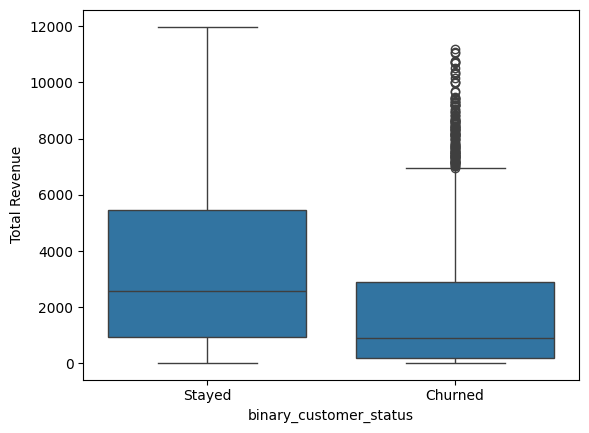

## Log Transformed Total Revenue 

count    7043.000000
mean        7.289894
std         1.490241
min         3.061988
25%         6.406253
50%         7.653803
75%         8.476612
max         9.390940
Name: Total Revenue, dtype: float64

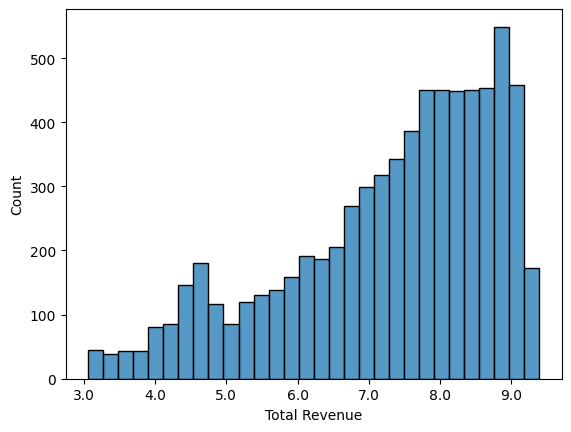

## Transformed Total Revenue and Customer Status

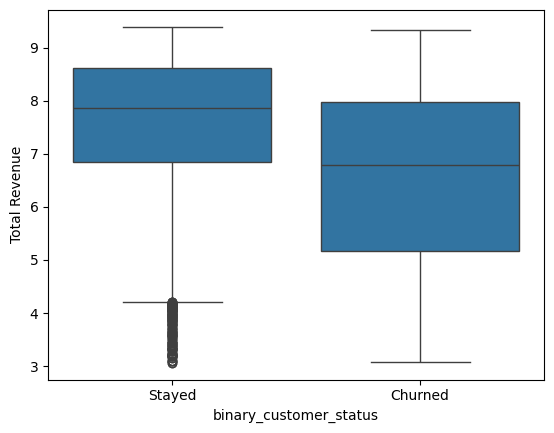

# Churn Category

count           1869
unique             5
top       Competitor
freq             841
Name: Churn Category, dtype: object

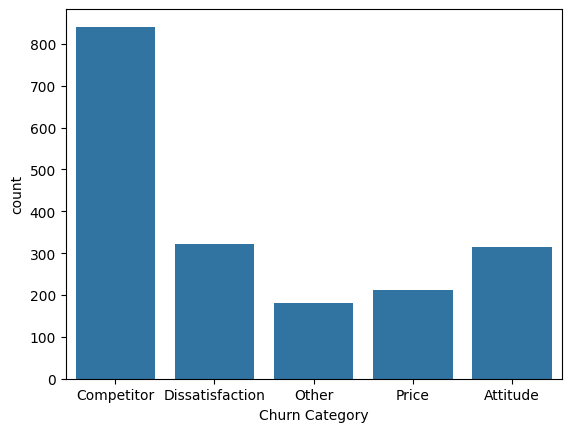

## Churn Category and Customer Status

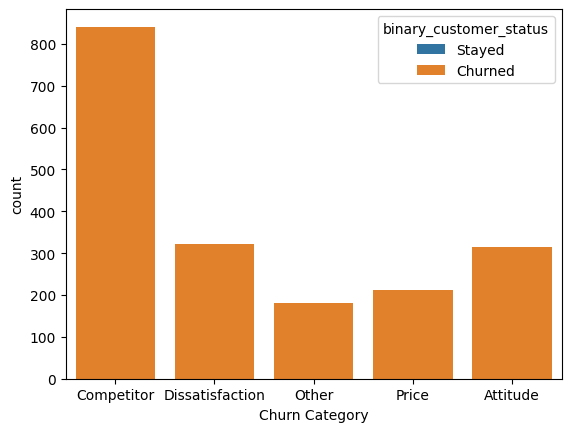

# Population

count      7043.000000
mean      22139.603294
std       21152.392837
min          11.000000
25%        2344.000000
50%       17554.000000
75%       36125.000000
max      105285.000000
Name: Population, dtype: float64

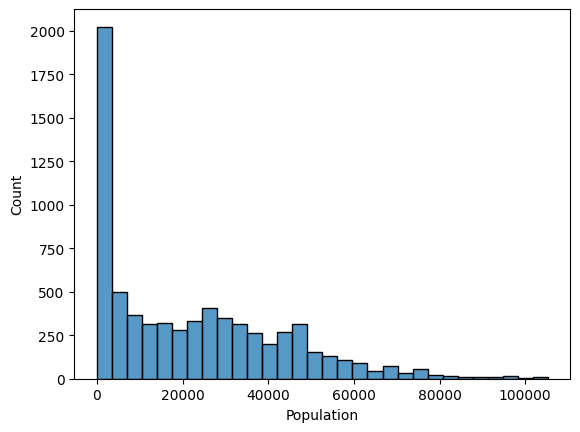

## Population and Customer Status

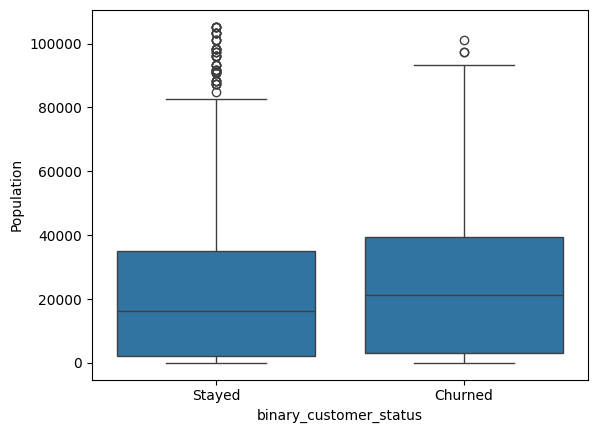

## Log Transformed Population 

count    7043.000000
mean        9.039826
std         1.871687
min         2.398804
25%         7.759618
50%         9.773038
75%        10.494741
max        11.564426
Name: Population, dtype: float64

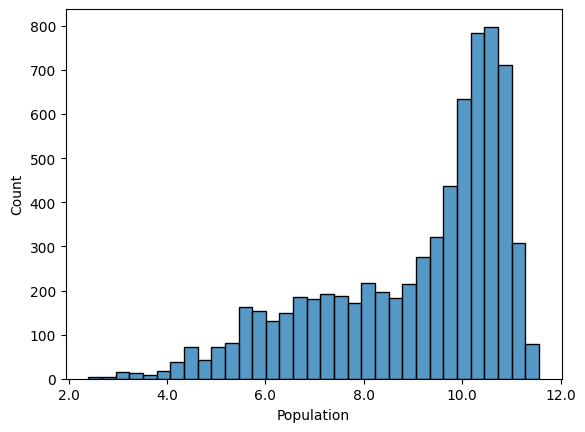

## Transformed Population and Customer Status

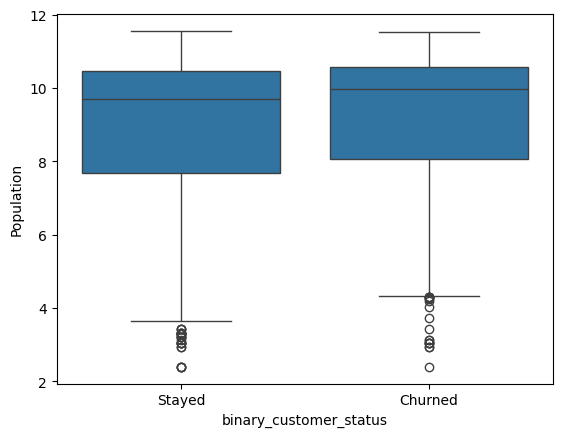

# regional_cluster

count     7043
unique       3
top          1
freq      3399
Name: regional_cluster, dtype: int64

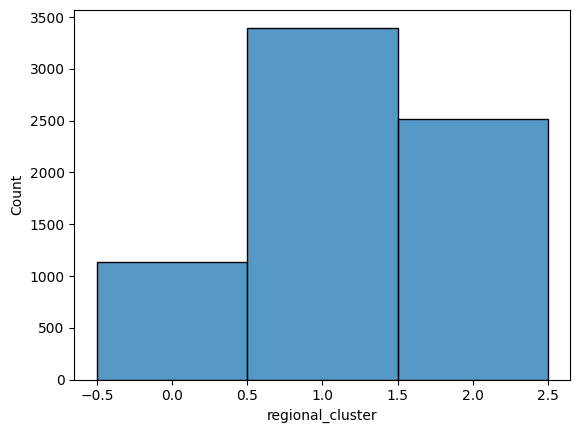

## regional_cluster and Customer Status

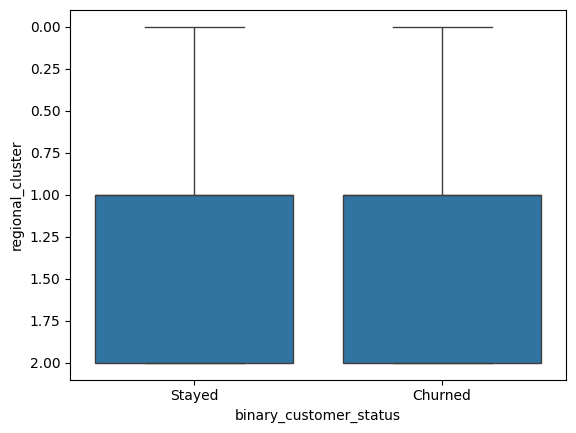

In [ ]:
transformed_df = customer_df.copy()

# show feature distributions
for col_name in customer_df.drop(columns=['Customer Status', 'binary_customer_status', 'Churn Reason']):

  # column title
  display(Markdown(f'# {col_name}'))

  # stats
  display(customer_df[col_name].describe())

  # categorical columns
  if customer_df[col_name].dtypes == 'object':

    if (col_name in ['City', 'Zip Code']):

      # Calculate value counts, sort, and select the top ten categories
      top_ten_categories = customer_df[col_name].value_counts().nlargest(10).index

      # Create the countplot with top ten categories
      sns.countplot(x=col_name, data=customer_df, order=top_ten_categories)
      # Rotate x-axis labels
      plt.xticks(rotation=45)
      plt.show()

    else:
      sns.countplot(data=customer_df, x=col_name)
      plt.show()
      print()
      # column title
      display(Markdown(f'## {col_name} and Customer Status'))
      sns.countplot(data=customer_df, x=col_name, hue='binary_customer_status', )
      plt.show()

  # numerical columns
  else:
    # histplot
    sns.histplot(data=customer_df, x=col_name)
    plt.show()
    print()

    # column title
    display(Markdown(f'## {col_name} and Customer Status'))
    sns.boxplot(data=customer_df, x='binary_customer_status', y=col_name)
    plt.show()

    # Log transform if skewed
    if (col_name in ['Number of Dependents', 'Number of Referrals', 'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download', 'Monthly Charge',
                     'Total Charges', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue', 'Population']):

      # Log Tranformation
      display(Markdown(f'## Log Transformed {col_name} '))
      # transform the skewed column
      transformed_df[col_name] = np.log(transformed_df[col_name] + 0.01)  # Adding 0.01 to avoid log(0)

      # stats
      display(transformed_df[col_name].describe())
      # transformed histplot
      ax = sns.histplot(data=transformed_df, x=col_name)
      # set the format for the x-tick labels to show only one decimal place
      ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
      plt.show()

      # column + customer status
      display(Markdown(f'## Transformed {col_name} and Customer Status'))
      sns.boxplot(data=transformed_df, x='binary_customer_status', y=col_name)
      plt.show()

    # Polynomial for U-shape distribution
    elif col_name == 'Tenure in Months':

      # Polynomial tranformation
      display(Markdown(f'## Polynomial Transformed {col_name} '))
      # Assuming df is your DataFrame and 'Tenure in Months' is the column
      tenure = customer_df['Tenure in Months'].values.reshape(-1, 1)

      # Create polynomial features (e.g., squared term)
      poly = PolynomialFeatures(degree=2, include_bias=False)
      tenure_poly = poly.fit_transform(tenure)

      # Add the polynomial feature back to the DataFrame
      transformed_df['Tenure in Months'] = tenure_poly[:,1]  # Assuming the second column is the squared term

      # stats
      display(transformed_df[col_name].describe())
      # transformed histplot
      ax = sns.histplot(data=transformed_df, x=col_name)
      # set the format for the x-tick labels to show only one decimal place
      ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
      plt.show()

      # column + customer status
      display(Markdown(f'## Transformed {col_name} and Customer Status'))
      sns.boxplot(data=transformed_df, x='binary_customer_status', y=col_name)
      plt.show()

## Save Cleaned Data

In [ ]:
# Save the DataFrame to a CSV file in a specific folder in Google Drive
#customer_df.to_csv('gdrive/My Drive/Syracuse/6 Big Data/Final Project/cleaned_customer_df.csv', index=False)